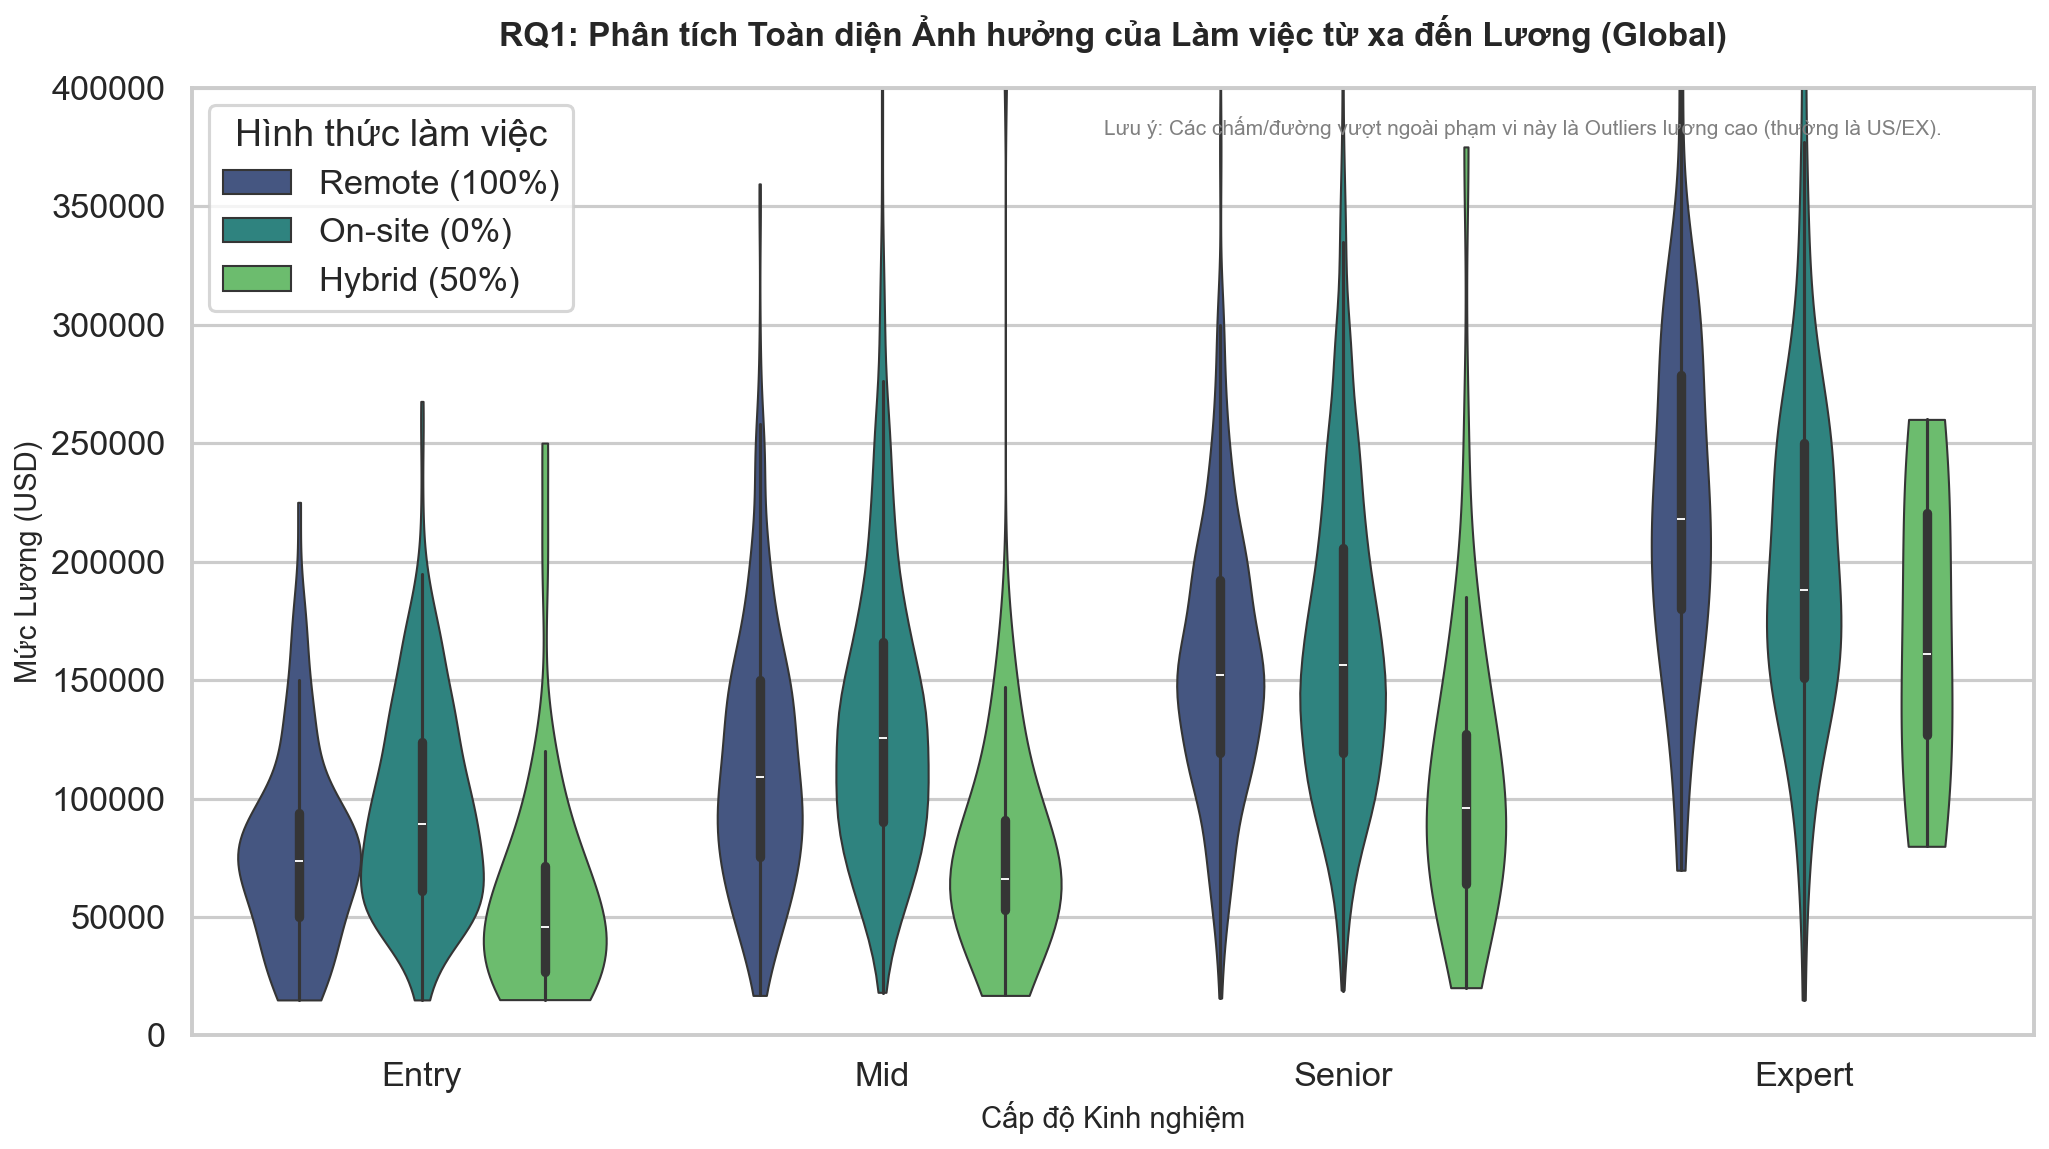

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Tải dữ liệu
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# --- Xử lý dữ liệu (Pre-processing) ---

# Ánh xạ Cấp độ kinh nghiệm cho dễ đọc
exp_map = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Expert'}
df['experience_label'] = df['experience_level'].map(exp_map)
exp_order = ['Entry', 'Mid', 'Senior', 'Expert']

# Ánh xạ Tỷ lệ Remote sang Danh mục
def map_remote(r):
    if r == 0: return 'On-site (0%)'
    elif r == 50: return 'Hybrid (50%)'
    else: return 'Remote (100%)'
df['remote_cat'] = df['remote_ratio'].apply(map_remote)

# --- Thiết lập Biểu đồ ---

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.dpi'] = 150

# Khởi tạo figure và axes
plt.figure(figsize=(14, 8))

# Tạo Box Plot (Biểu đồ Hộp) kết hợp Violin Plot để hiển thị phân phối
# 'inner="quartile"': Giữ lại các đường Q1, Median, Q3 bên trong box plot.
# 'showfliers=True': HIỂN THỊ CÁC GIÁ TRỊ NGOẠI LAI (OUTLIERS)
sns.violinplot(
    x='experience_label', 
    y='salary_in_usd', 
    hue='remote_cat', 
    data=df, 
    order=exp_order, 
    palette="viridis", # Palette màu chuyên nghiệp
    split=False, # Không tách nửa violin
    inner="box", # Hiển thị boxplot bên trong violin
    linewidth=1.0, 
    cut=0 # Đảm bảo dữ liệu không bị cắt
)

# Thêm tiêu đề và nhãn
plt.title(
    'RQ1: Phân tích Toàn diện Ảnh hưởng của Làm việc từ xa đến Lương (Global)', 
    fontweight='bold', 
    fontsize=16, 
    pad=20
)
plt.ylabel('Mức Lương (USD)', fontsize=14)
plt.xlabel('Cấp độ Kinh nghiệm', fontsize=14)
plt.legend(title='Hình thức làm việc', loc='upper left')

# Giới hạn trục Y (để làm rõ phần lớn dữ liệu, nhưng vẫn thấy outliers)
# Đặt giới hạn dưới 400.000 USD để tránh kéo giãn biểu đồ quá mức do một số outliers cực lớn
plt.ylim(0, 400000) 

# Thêm ghi chú về Outliers
plt.text(
    0.95, 
    0.95, 
    'Lưu ý: Các chấm/đường vượt ngoài phạm vi này là Outliers lương cao (thường là US/EX).', 
    transform=plt.gca().transAxes, 
    fontsize=10, 
    color='gray', 
    ha='right'
)

plt.tight_layout()
plt.show()

# Lưu biểu đồ
# plt.savefig('rq1_comprehensive_remote_impact.png')
# plt.close()

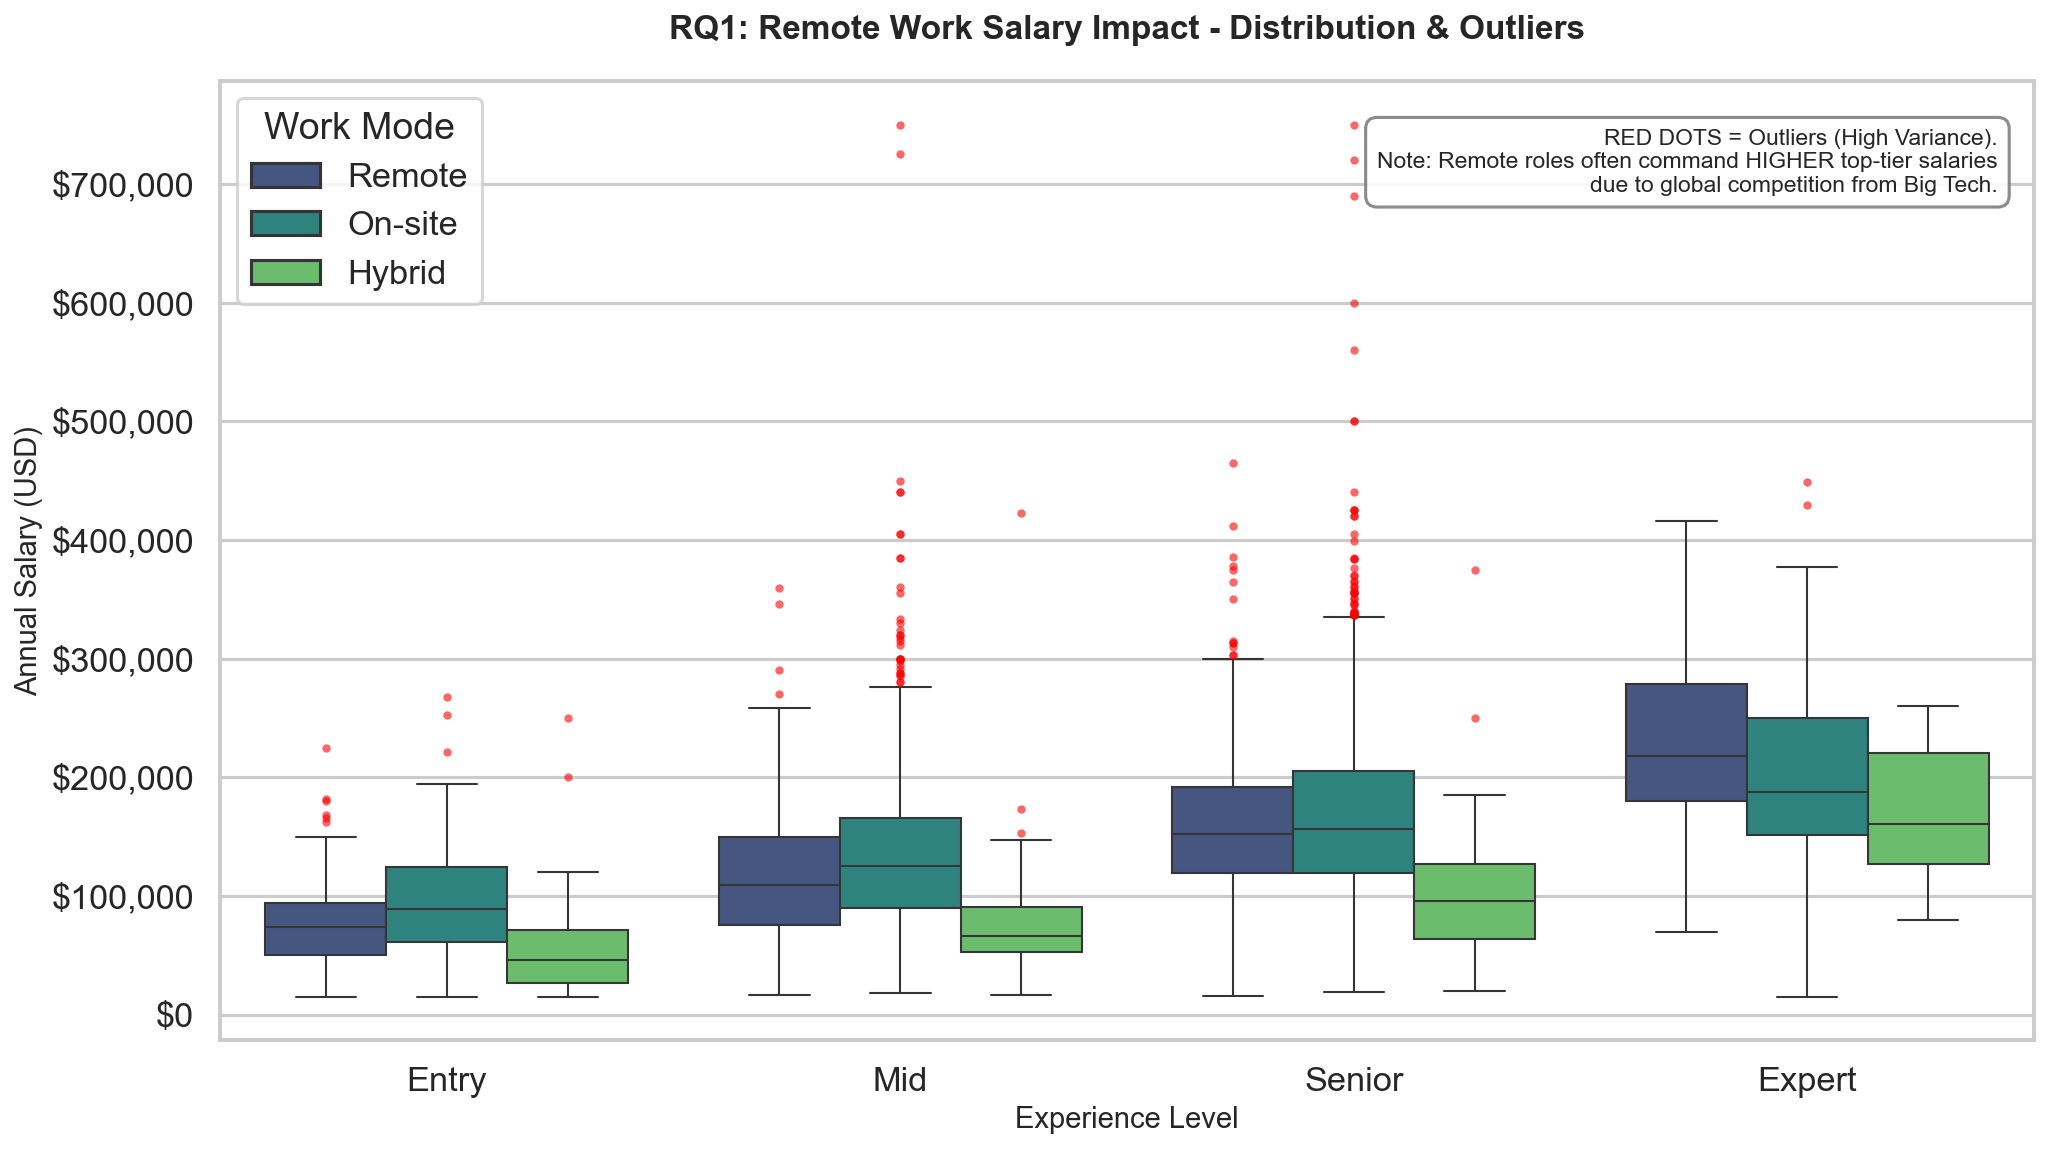

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# Load Data
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# --- Data Preprocessing ---
# Map Experience Levels for clarity
exp_map = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Expert'}
df['experience_label'] = df['experience_level'].map(exp_map)
exp_order = ['Entry', 'Mid', 'Senior', 'Expert']

# Map Remote Ratio to clear Categories
def map_remote(r):
    if r == 0: return 'On-site'
    elif r == 50: return 'Hybrid'
    else: return 'Remote'
df['remote_cat'] = df['remote_ratio'].apply(map_remote)

# --- Visualization ---
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(14, 8))

# Create the Boxplot with explicitly styled Outliers
# showfliers=True: Essential to show the high cost of top talent
# flierprops: Styles the outliers as red, semi-transparent dots
ax = sns.boxplot(x='experience_label', 
                 y='salary_in_usd', 
                 hue='remote_cat',
                 data=df, 
                 order=exp_order, 
                 palette="viridis",
                 showfliers=True,
                 flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 4, "markeredgecolor": "none", "alpha": 0.6})

# --- Styling & Annotations ---
plt.title('RQ1: Remote Work Salary Impact - Distribution & Outliers', fontweight='bold', pad=20, fontsize=16)
plt.ylabel('Annual Salary (USD)', fontsize=14)
plt.xlabel('Experience Level', fontsize=14)
plt.legend(title='Work Mode', loc='upper left')

# Format Y-axis to Currency ($)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Add Strategic Annotation regarding Outliers
plt.text(0.98, 0.95, 
         'RED DOTS = Outliers (High Variance).\nNote: Remote roles often command HIGHER top-tier salaries\ndue to global competition from Big Tech.', 
         transform=ax.transAxes, fontsize=11, ha='right', va='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Count samples per work_year
samples_per_year = df['work_year'].value_counts().sort_index()

print(samples_per_year)


work_year
2020      75
2021     218
2022     783
2023     774
2024    1364
2025    1430
Name: count, dtype: int64


Remaining years: [np.int64(2020), np.int64(2021)]
work_model
Remote     152
Hybrid      94
On-site     47
Name: count, dtype: int64


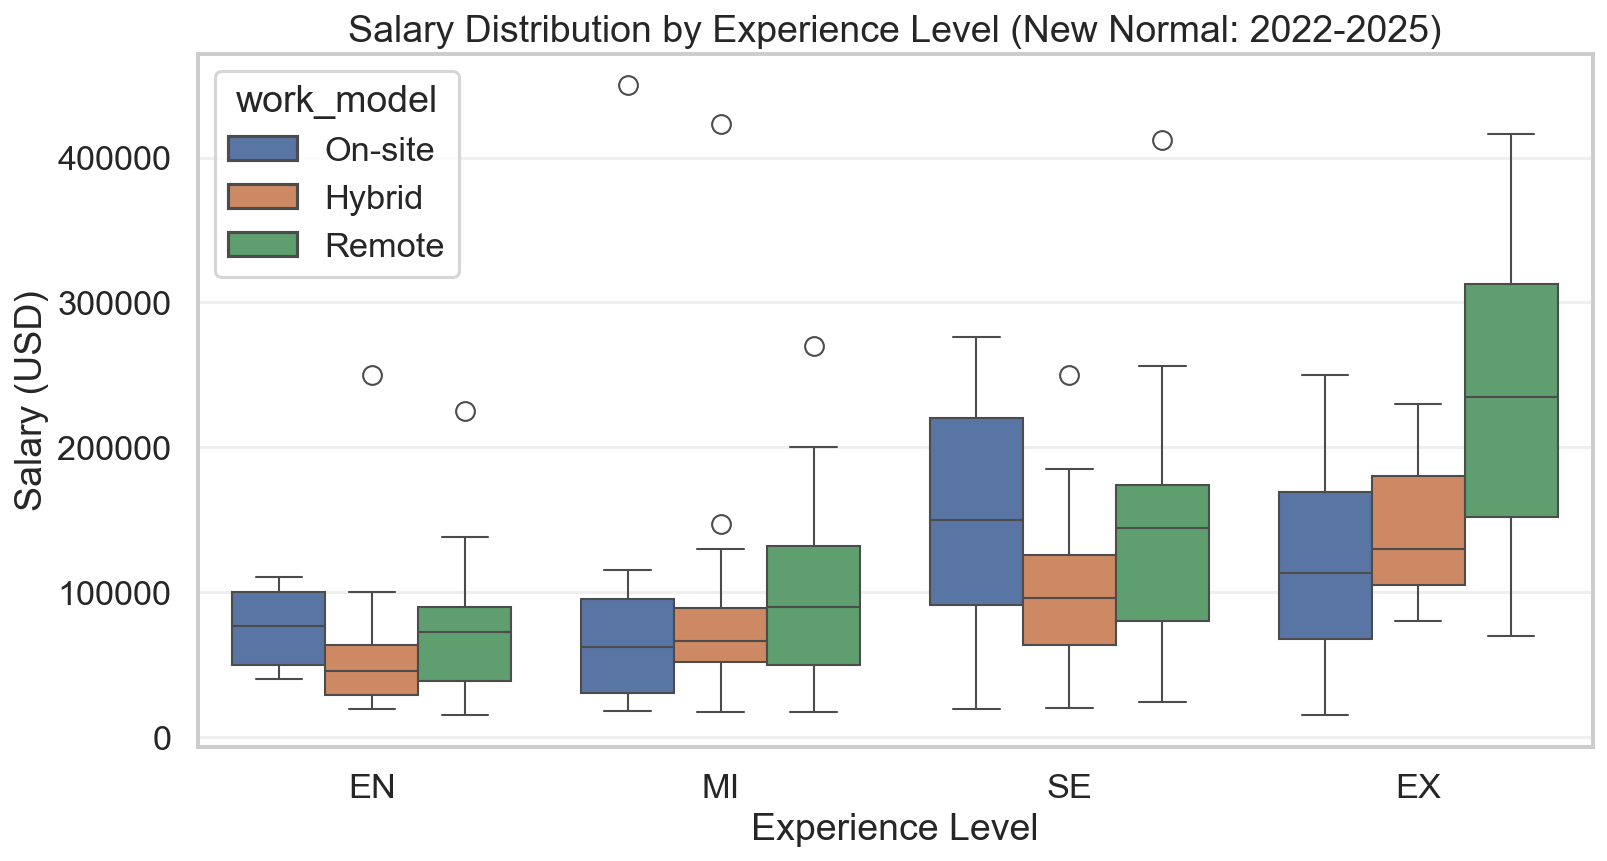

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Preprocessing
# Map numeric values to text labels for better readability
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

# 3. Filter for "New Normal" (Excluding 2020 and 2021)
# We select all records where the work_year is greater than or equal to 2022
df_new_normal = df[df['work_year'] <= 2021].copy()


df_new_normal["work_model"] = df_new_normal['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})
print("Remaining years:", sorted(df_new_normal['work_year'].unique()))
print(df_new_normal['work_model'].value_counts())


# 4. Set logical order for experience levels
exp_order = ['EN', 'MI', 'SE', 'EX']
df_new_normal['experience_level'] = pd.Categorical(
    df_new_normal['experience_level'], 
    categories=exp_order, 
    ordered=True
)

# 5. Generate the Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_new_normal, 
    x='experience_level', 
    y='salary_in_usd', 
    hue='work_model', 
    hue_order=['On-site', 'Hybrid', 'Remote']
)

# Set titles and labels
plt.title('Salary Distribution by Experience Level (New Normal: 2022-2025)')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.grid(True, axis='y', alpha=0.3)

# Save the plot
plt.savefig('salary_boxplot_new_normal.png')
plt.show()

work_model
On-site    3164
Remote     1347
Hybrid      133
Name: count, dtype: int64


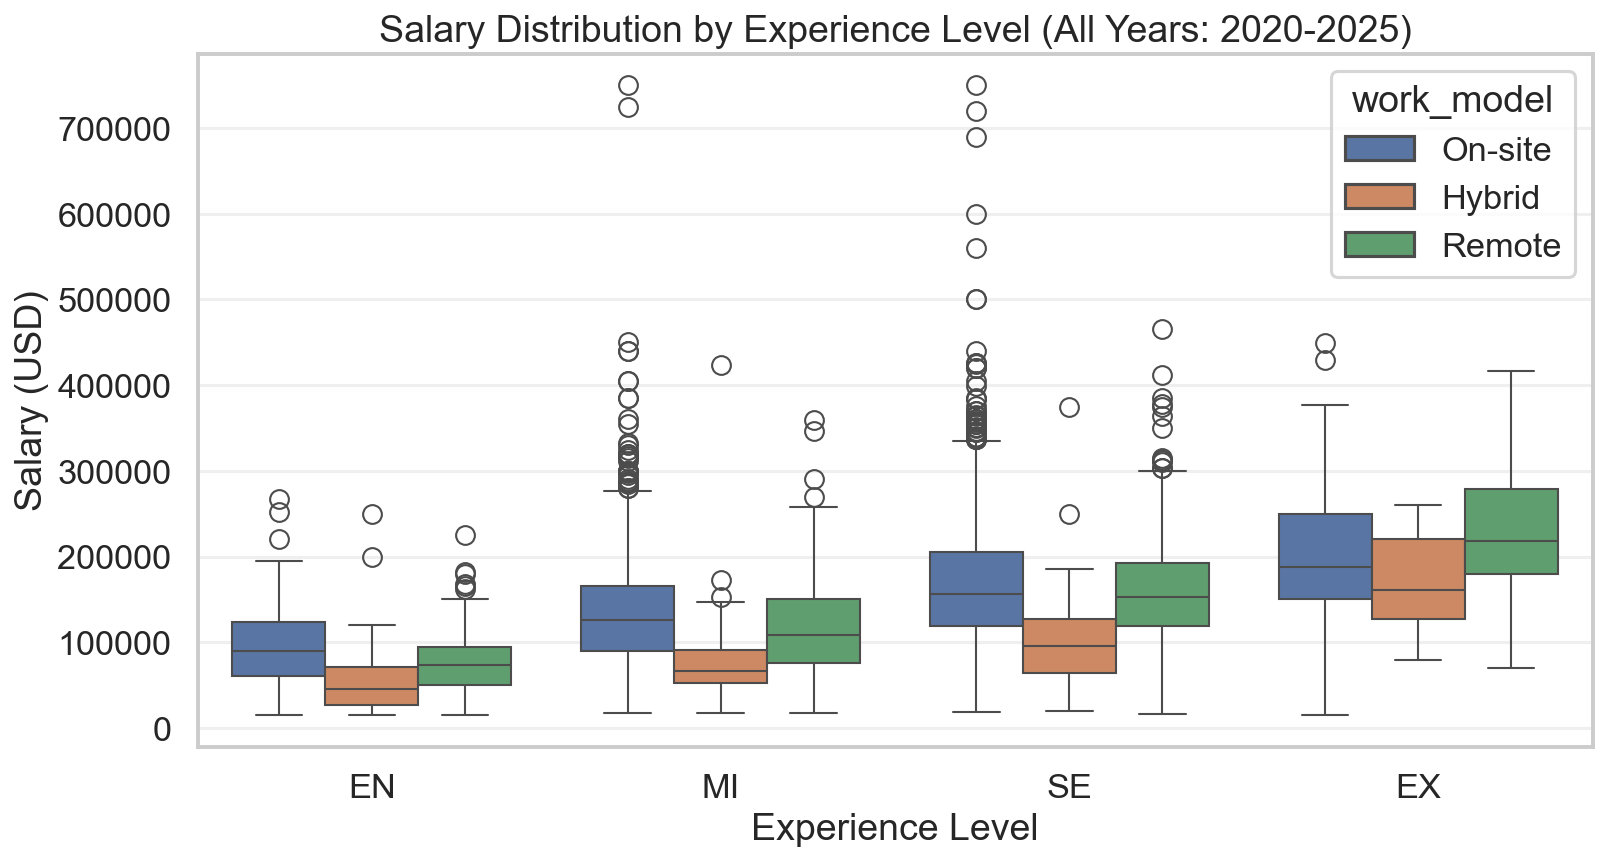

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Preprocessing
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

overall_counts = df['work_model'].value_counts()
print(overall_counts)

# 4. Set logical order for experience levels
exp_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(
    df['experience_level'], 
    categories=exp_order, 
    ordered=True
)

# 5. Generate the Boxplot (Using full 'df')
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    hue='work_model', 
    hue_order=['On-site', 'Hybrid', 'Remote']
)

plt.title('Salary Distribution by Experience Level (All Years: 2020-2025)')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.grid(True, axis='y', alpha=0.3)

plt.savefig('salary_boxplot_all_years.png')
plt.show()

--- Volume (Count) by Year ---
work_model  Hybrid  On-site  Remote
work_year                          
2020            21       18      36
2021            73       29     116
2022            29      344     410
2023             8      521     245
2024             1     1105     258
2025             1     1147     282

--- Average Salary Trends (USD) ---
work_model    Hybrid   On-site    Remote  Remote_vs_Onsite_Diff  \
work_year                                                         
2020         86879.0   94258.0  115214.0                20956.0   
2021         81312.0  106836.0  109905.0                 3070.0   
2022         99385.0  131439.0  136395.0                 4956.0   
2023         63004.0  156150.0  144844.0               -11306.0   
2024        260000.0  163229.0  150907.0               -12321.0   
2025         22584.0  151175.0  159386.0                 8211.0   

work_model  Remote_Discount_Pct  
work_year                        
2020                       22.0  
2021 

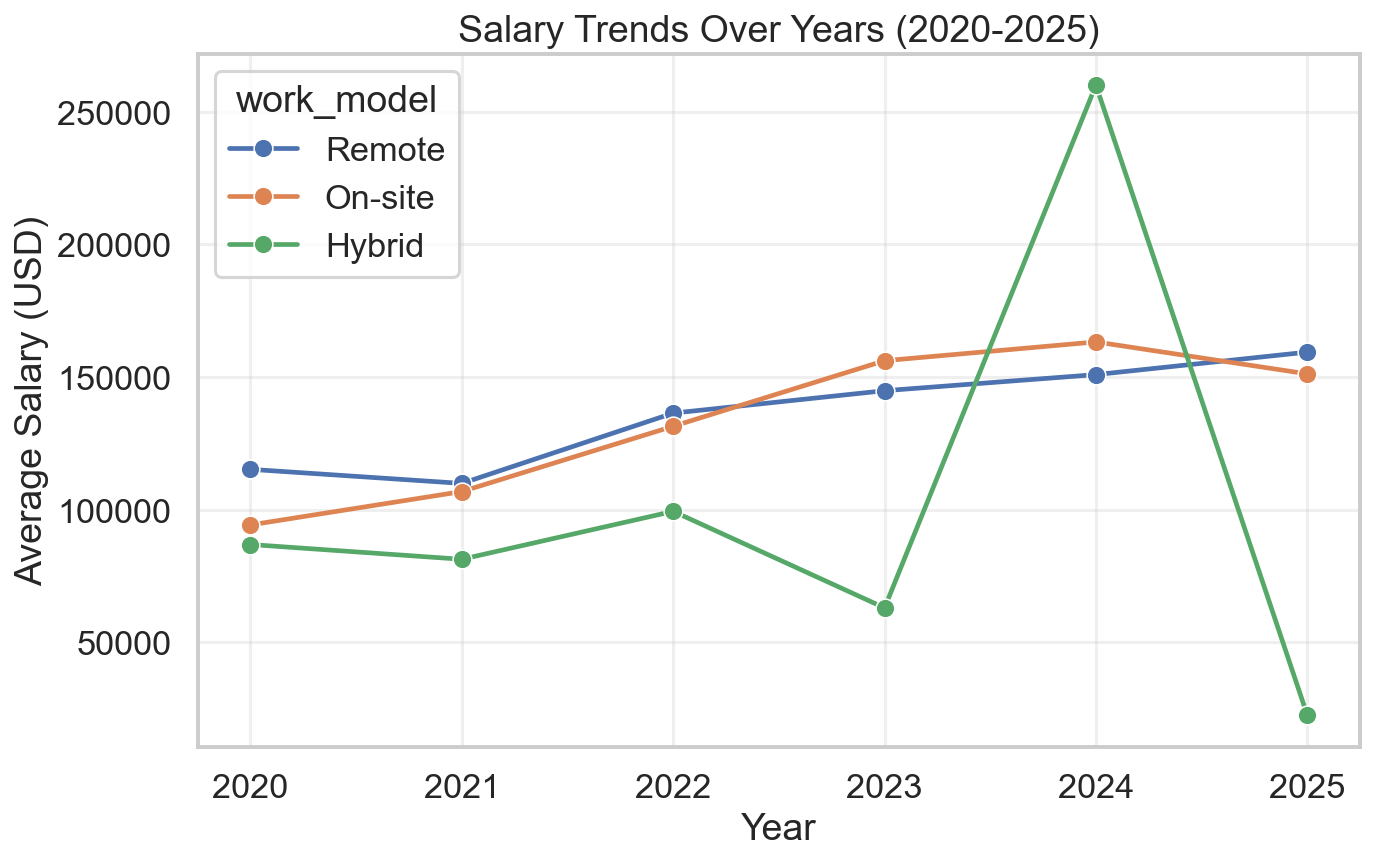

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Map remote_ratio
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

# 1. Check Volume: How did the mix of Work Models change over time?
volume_trend = df.groupby(['work_year', 'work_model']).size().unstack(fill_value=0)
print("--- Volume (Count) by Year ---")
print(volume_trend)

# 2. Check Price: Did the "Remote Discount" disappear in recent years?
price_trend = df.groupby(['work_year', 'work_model'])['salary_in_usd'].mean().unstack()
price_trend['Remote_vs_Onsite_Diff'] = price_trend['Remote'] - price_trend['On-site']
price_trend['Remote_Discount_Pct'] = (price_trend['Remote_vs_Onsite_Diff'] / price_trend['On-site']) * 100

print("\n--- Average Salary Trends (USD) ---")
print(price_trend.round(0))

# Visualization: Salary Trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='work_model', marker='o', errorbar=None)
plt.title('Salary Trends Over Years (2020-2025)')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.savefig('salary_trend_year.png')

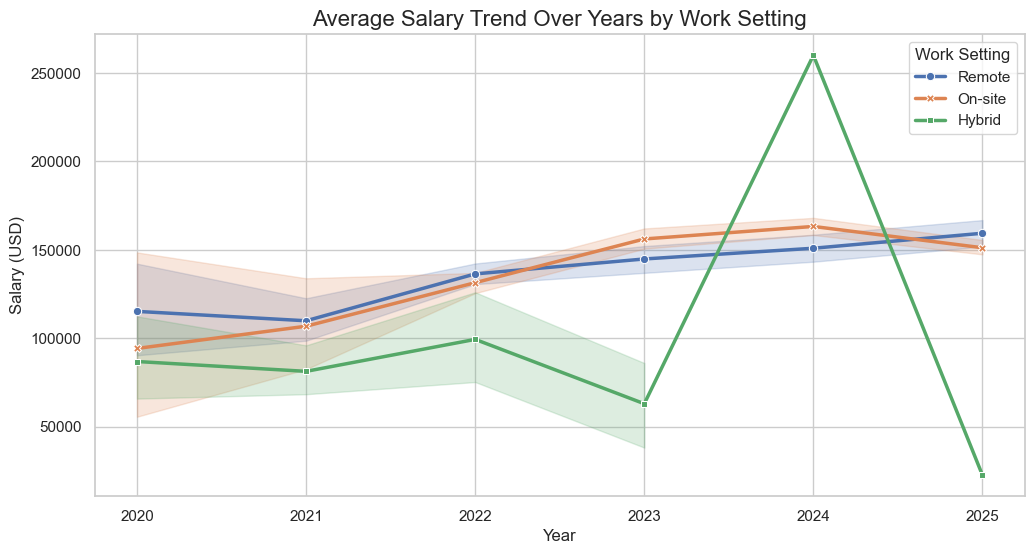

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Create a meaningful label for remote_ratio
# 0 -> On-site, 50 -> Hybrid, 100 -> Remote
df['work_setting'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

# Set the visual style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the trend with 'hue' to differentiate by work setting
sns.lineplot(
    data=df, 
    x='work_year', 
    y='salary_in_usd', 
    hue='work_setting', 
    style='work_setting', 
    markers=True, 
    dashes=False,
    linewidth=2.5
)

# Add titles and labels
plt.title('Average Salary Trend Over Years by Work Setting', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(title='Work Setting')

# Ensure x-axis shows integer years
plt.xticks(sorted(df['work_year'].unique()))

# Show the plot
plt.show()

Key Statistics to Report:
Mean: $148,309
Median: $140,000
Standard Deviation: $71,867
Range: $15,000 - $750,000
25th/75th Percentiles: $99,100 / $185,000
------------------------------


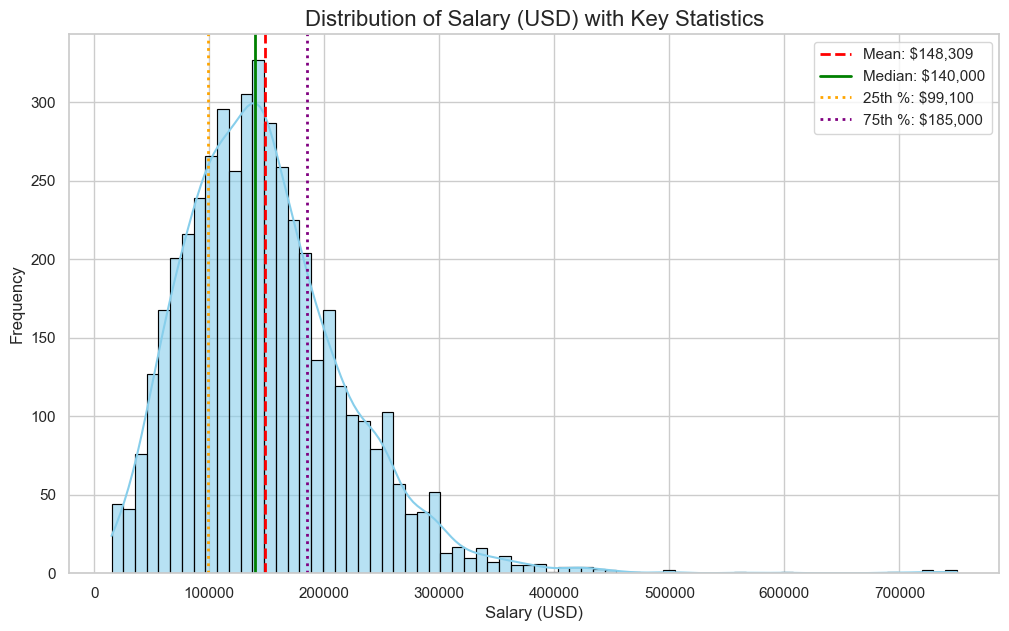

Insight:
The salary distribution exhibits right-skewness with mean salary ($148,309) exceeding median ($140,000) by $8,309, indicating presence of high-earning outliers. The interquartile range ($99,100-$185,000) captures the middle 50% of salaries, providing a reference band for typical compensation.

Connection to RQs:
Understanding the baseline salary distribution is essential for RQ4's savings calculations—optimization strategies must account for this natural variation when estimating cost reduction potential.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Calculate Key Statistics
salary = df['salary_in_usd']
mean_val = salary.mean()
median_val = salary.median()
std_val = salary.std()
min_val = salary.min()
max_val = salary.max()
p25 = salary.quantile(0.25)
p75 = salary.quantile(0.75)

# 3. Print Statistics Report
print("Key Statistics to Report:")
print(f"Mean: ${mean_val:,.0f}")
print(f"Median: ${median_val:,.0f}")
print(f"Standard Deviation: ${std_val:,.0f}")
print(f"Range: ${min_val:,.0f} - ${max_val:,.0f}")
print(f"25th/75th Percentiles: ${p25:,.0f} / ${p75:,.0f}")
print("-" * 30)

# 4. Generate Visualization
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Create Histogram with KDE
sns.histplot(salary, kde=True, color='skyblue', edgecolor='black', alpha=0.6)

# Overlay Statistics Lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:,.0f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: ${median_val:,.0f}')
plt.axvline(p25, color='orange', linestyle=':', linewidth=2, label=f'25th %: ${p25:,.0f}')
plt.axvline(p75, color='purple', linestyle=':', linewidth=2, label=f'75th %: ${p75:,.0f}')

# Titles and Labels
plt.title('Distribution of Salary (USD) with Key Statistics', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show Plot
plt.show()

# 5. Connection to Research Questions (Optional Context)
iqr = p75 - p25
skew_direction = "right" if mean_val > median_val else "left"
diff = abs(mean_val - median_val)

insight = (
    f"Insight:\n"
    f"The salary distribution exhibits {skew_direction}-skewness with mean salary (${mean_val:,.0f}) "
    f"exceeding median (${median_val:,.0f}) by ${diff:,.0f}, indicating presence of high-earning outliers. "
    f"The interquartile range (${p25:,.0f}-${p75:,.0f}) captures the middle 50% of salaries, "
    f"providing a reference band for typical compensation."
)
print(insight)
print("\nConnection to RQs:")
print("Understanding the baseline salary distribution is essential for RQ4's savings calculations—"
      "optimization strategies must account for this natural variation when estimating cost reduction potential.")

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\1928292048.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df.groupby('experience_level')['salary_in_usd'].agg(['count', 'mean', 'median']).reset_index()
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\1928292048.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\1928292048.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


--- SUMMARY STATISTICS FOR REPORT ---
  experience_level  count       mean    median
0               EN    400   87379.18   80000.0
1               MI   1376  128411.55  118000.0
2               SE   2739  164388.75  154600.0
3               EX    129  208049.16  200000.0
-------------------------------------


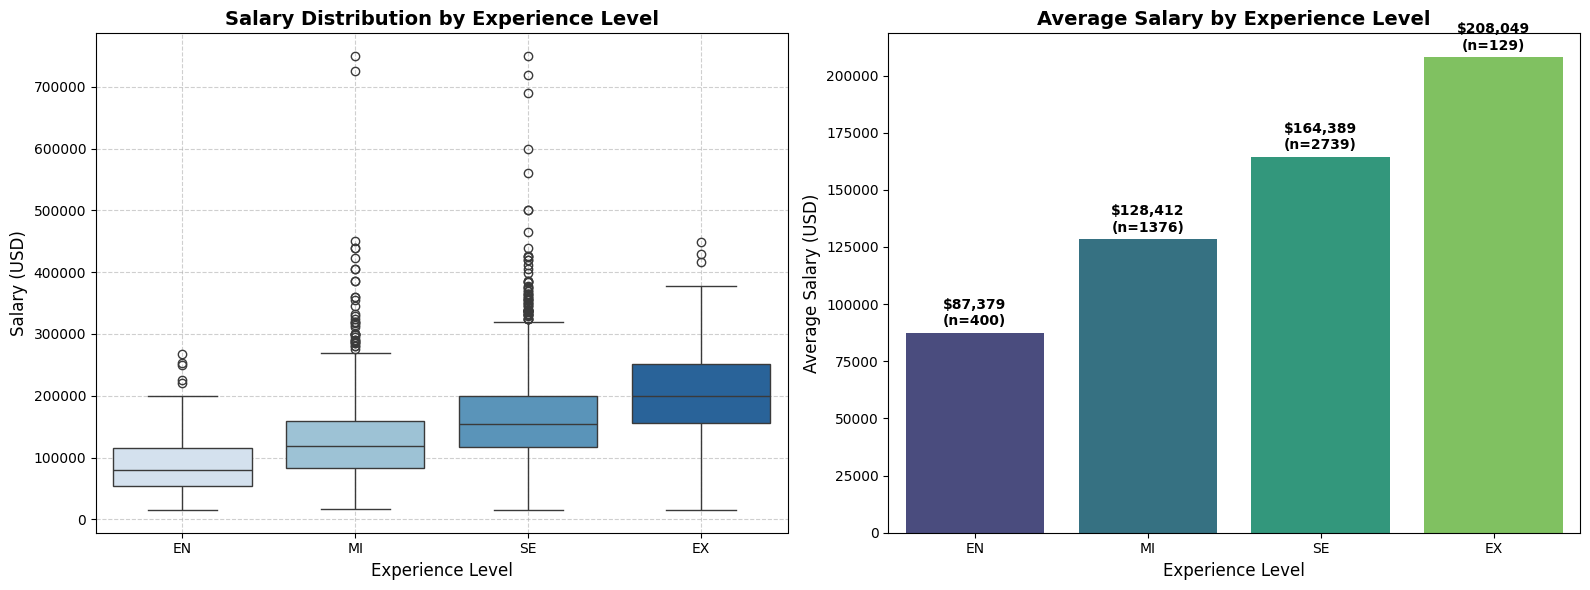

In [1]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load the dataset
# Make sure the .csv file is in the same folder as this notebook
# Based on the requirement file, the dataset is likely named 'FoAl A2_data.csv'
try:
    df = pd.read_csv('FoAl A2_data.csv')
except FileNotFoundError:
    # Fallback to the filename mentioned in your previous context if the above fails
    df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 3. Data Preparation
# Define the logical order for experience levels (Entry -> Executive)
# EN: Entry, MI: Mid, SE: Senior, EX: Executive [cite: 33]
exp_order = ['EN', 'MI', 'SE', 'EX']

# Convert experience_level to a categorical type with defined order
df['experience_level'] = pd.Categorical(df['experience_level'], categories=exp_order, ordered=True)

# 4. Calculate Summary Statistics (for the narrative)
# Group by experience level and calculate count, mean, and median
summary_stats = df.groupby('experience_level')['salary_in_usd'].agg(['count', 'mean', 'median']).reset_index()

# Formatting for display
print("--- SUMMARY STATISTICS FOR REPORT ---")
print(summary_stats.round(2))
print("-------------------------------------")

# 5. Generate Visualizations (Approach 1)
# Create a figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- PLOT 1: Box Plot (Distribution) ---
sns.boxplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    order=exp_order,
    ax=axes[0],
    palette='Blues'
)
axes[0].set_title('Salary Distribution by Experience Level', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Experience Level', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- PLOT 2: Bar Chart (Mean with Count Labels) ---
barplot = sns.barplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    estimator=np.mean, # Calculate Mean
    order=exp_order,
    ax=axes[1],
    palette='viridis',
    errorbar=None # Remove error bars for cleaner "Budget" view
)

axes[1].set_title('Average Salary by Experience Level', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Experience Level', fontsize=12)
axes[1].set_ylabel('Average Salary (USD)', fontsize=12)

# Add annotations (Count and Mean Value) on top of bars
# This is crucial for proving statistical significance (n=...) as per your strategy
for i, row in summary_stats.iterrows():
    # Get the height of the bar (mean value)
    height = row['mean']
    count = int(row['count'])
    
    # Place text above the bar
    axes[1].text(
        x=i, 
        y=height + 2000, # Add a small buffer so text floats above bar
        s=f'${height:,.0f}\n(n={count})', # Format: "$120,000 (n=450)"
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold',
        color='black'
    )

# 6. Final Layout Adjustments
plt.tight_layout()
plt.show()

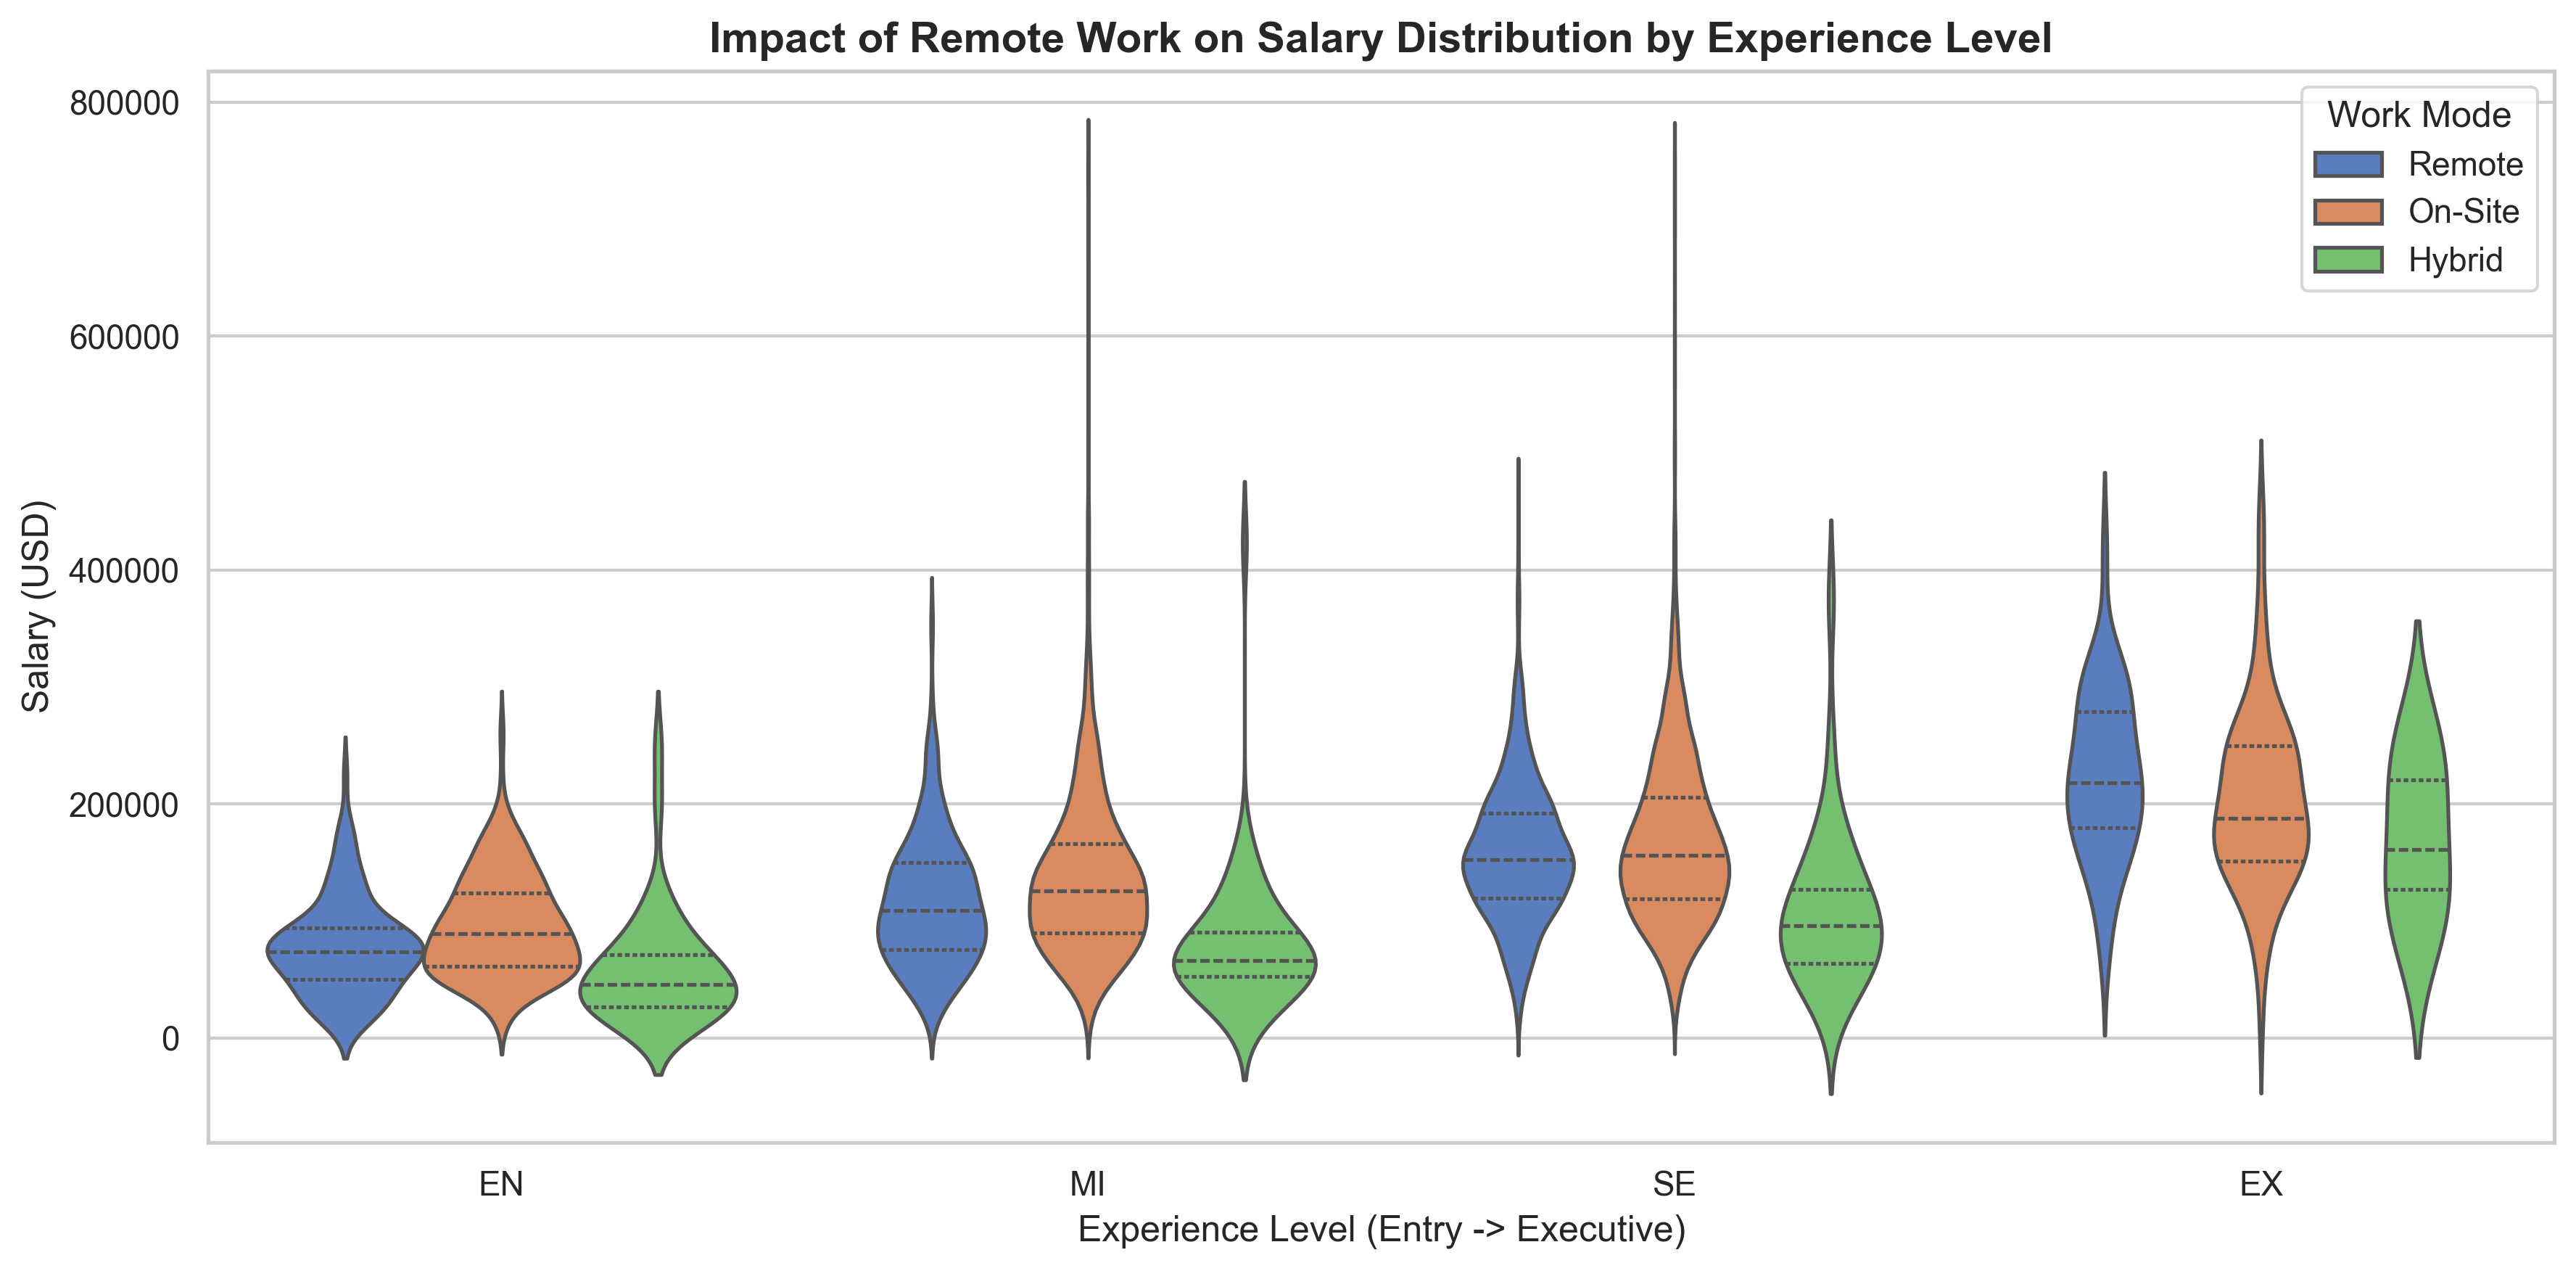

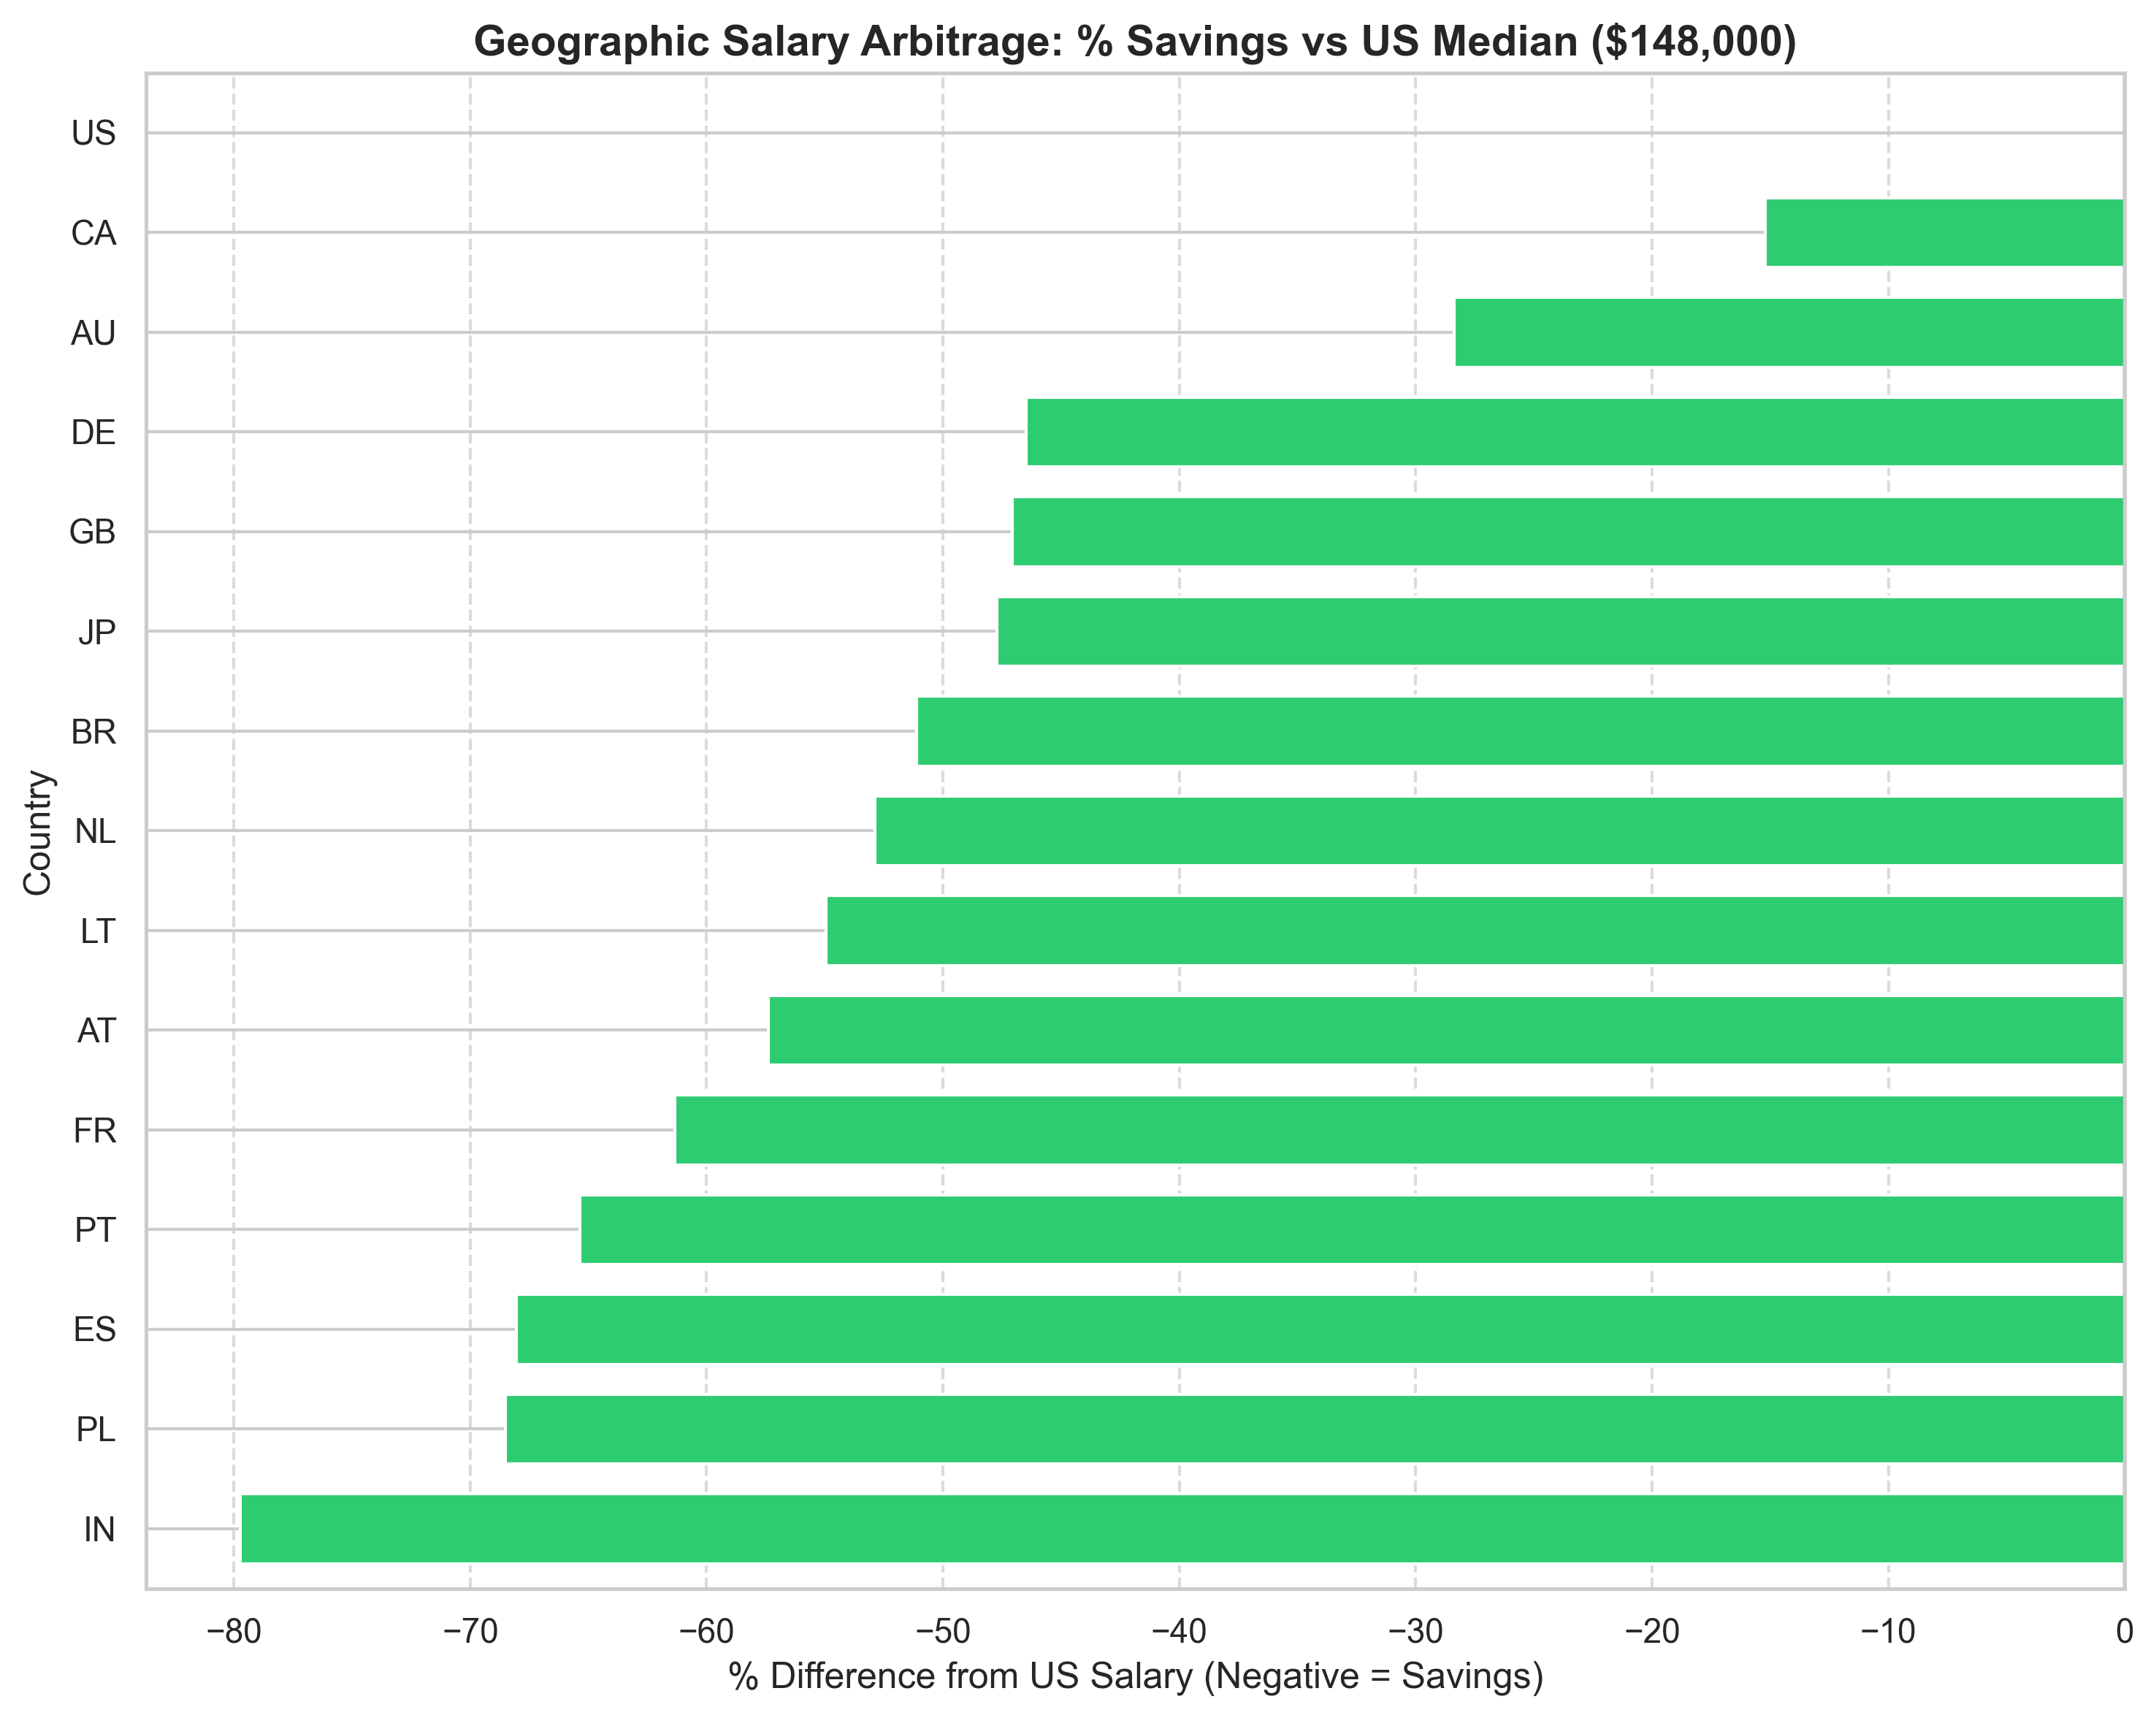

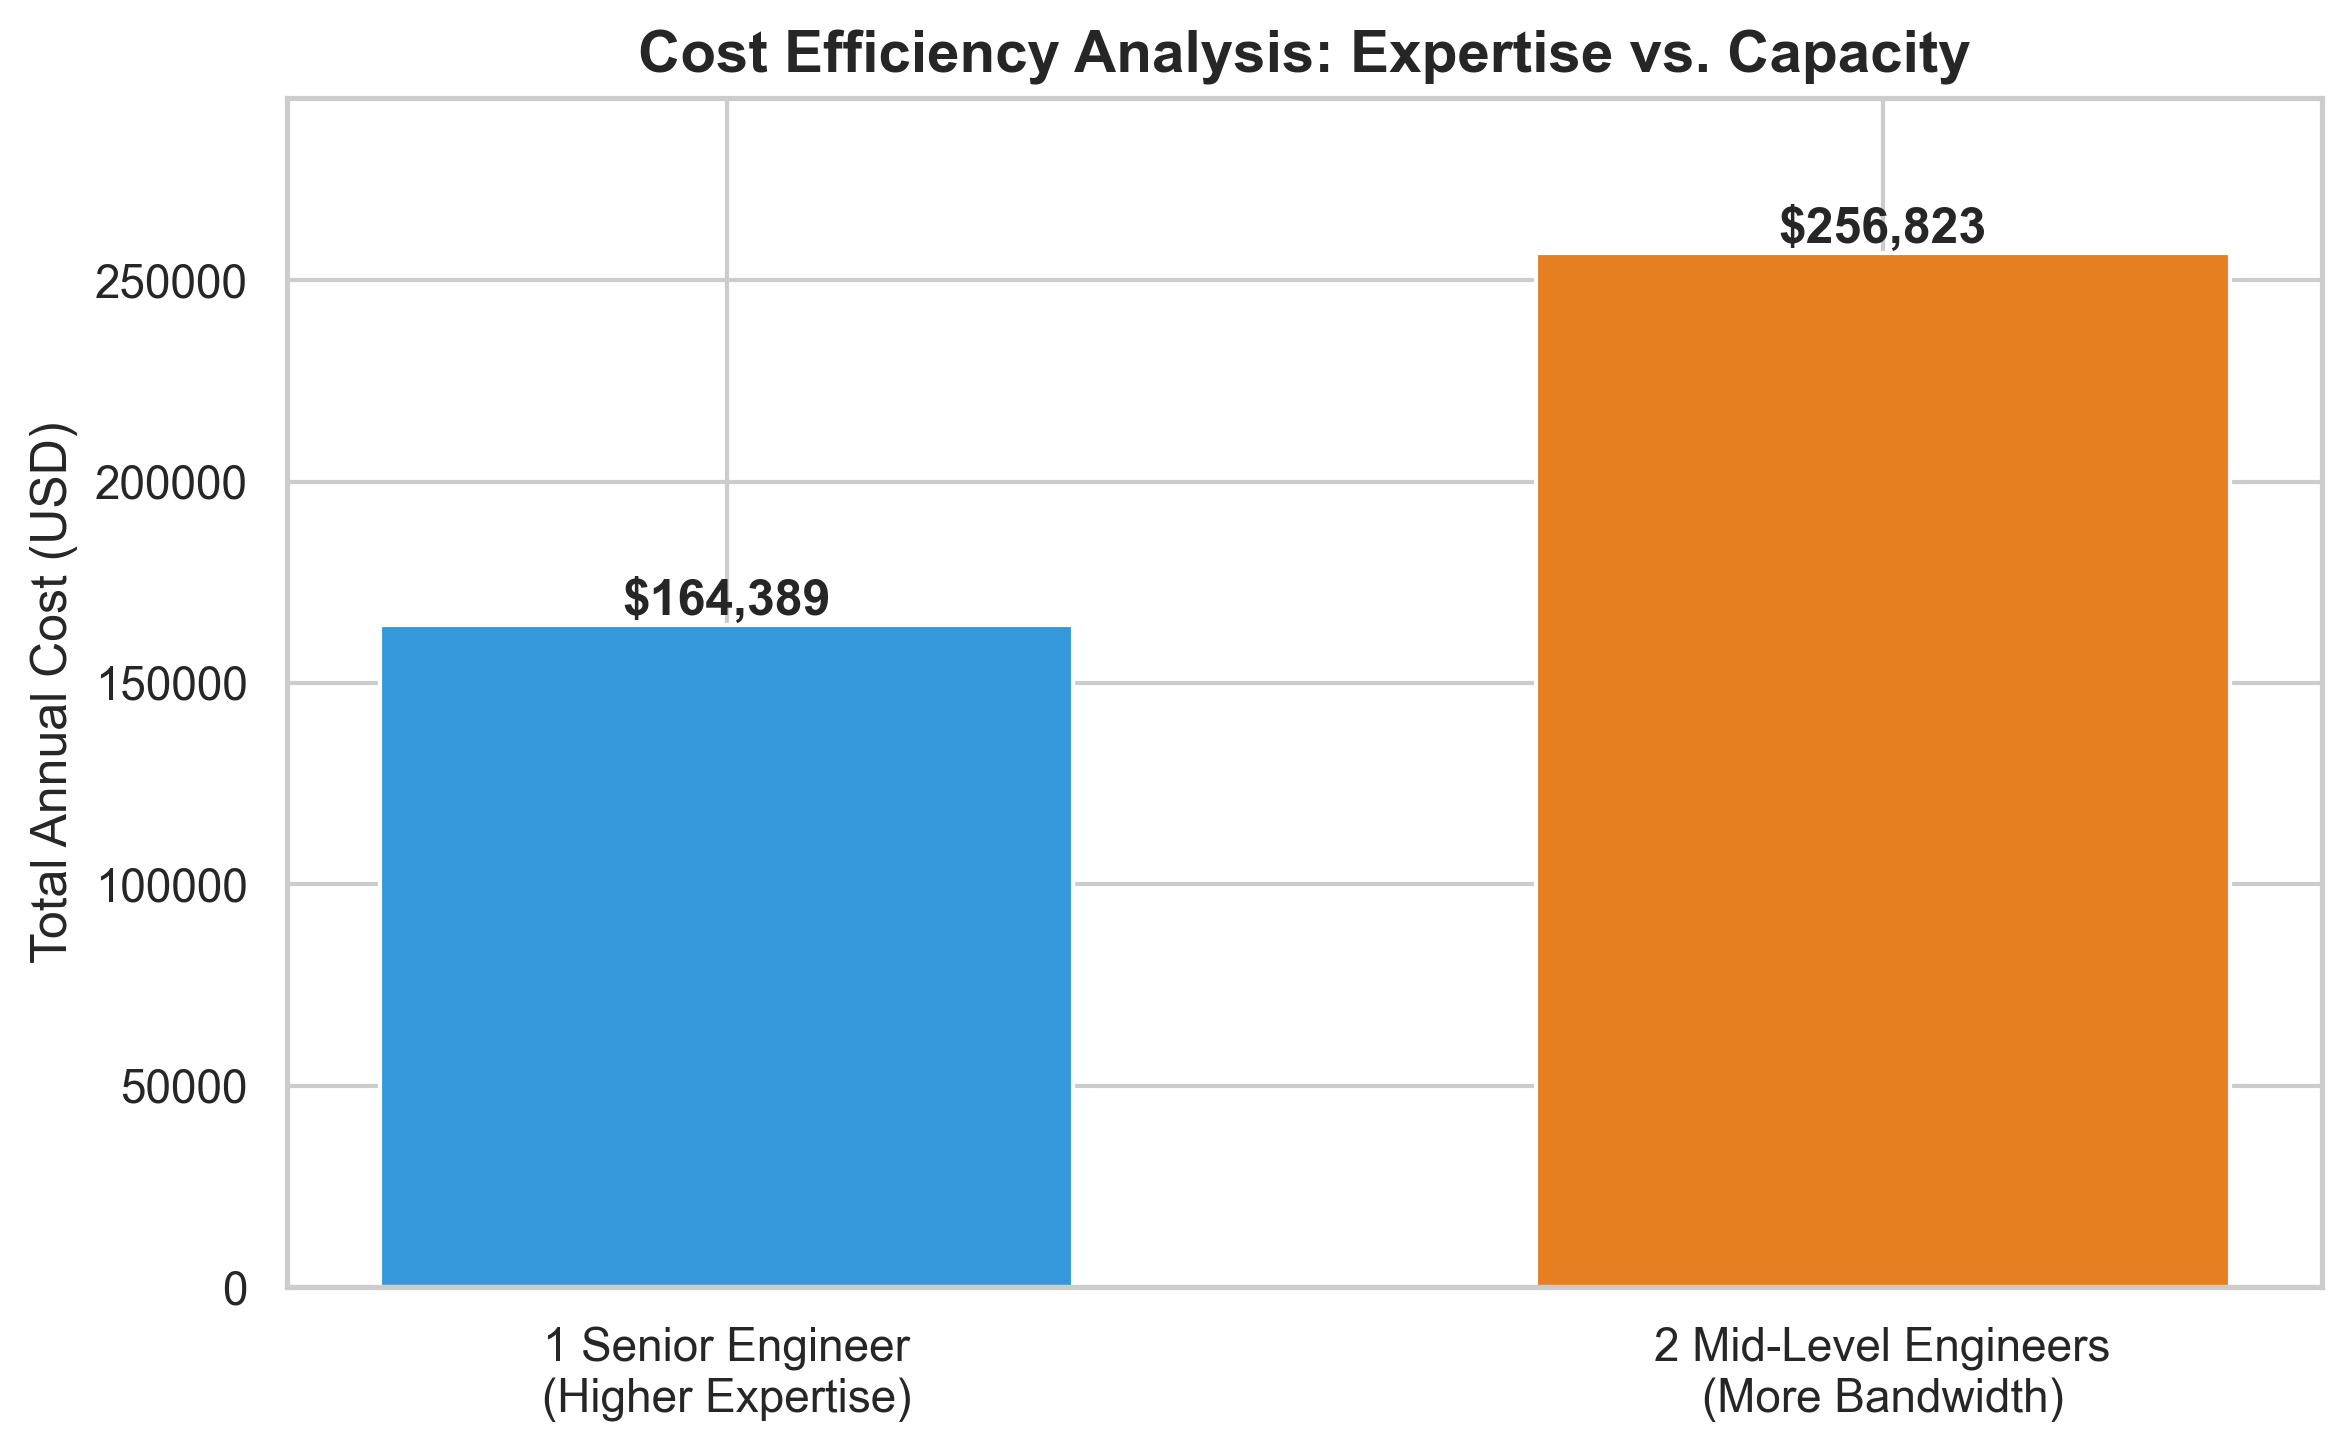

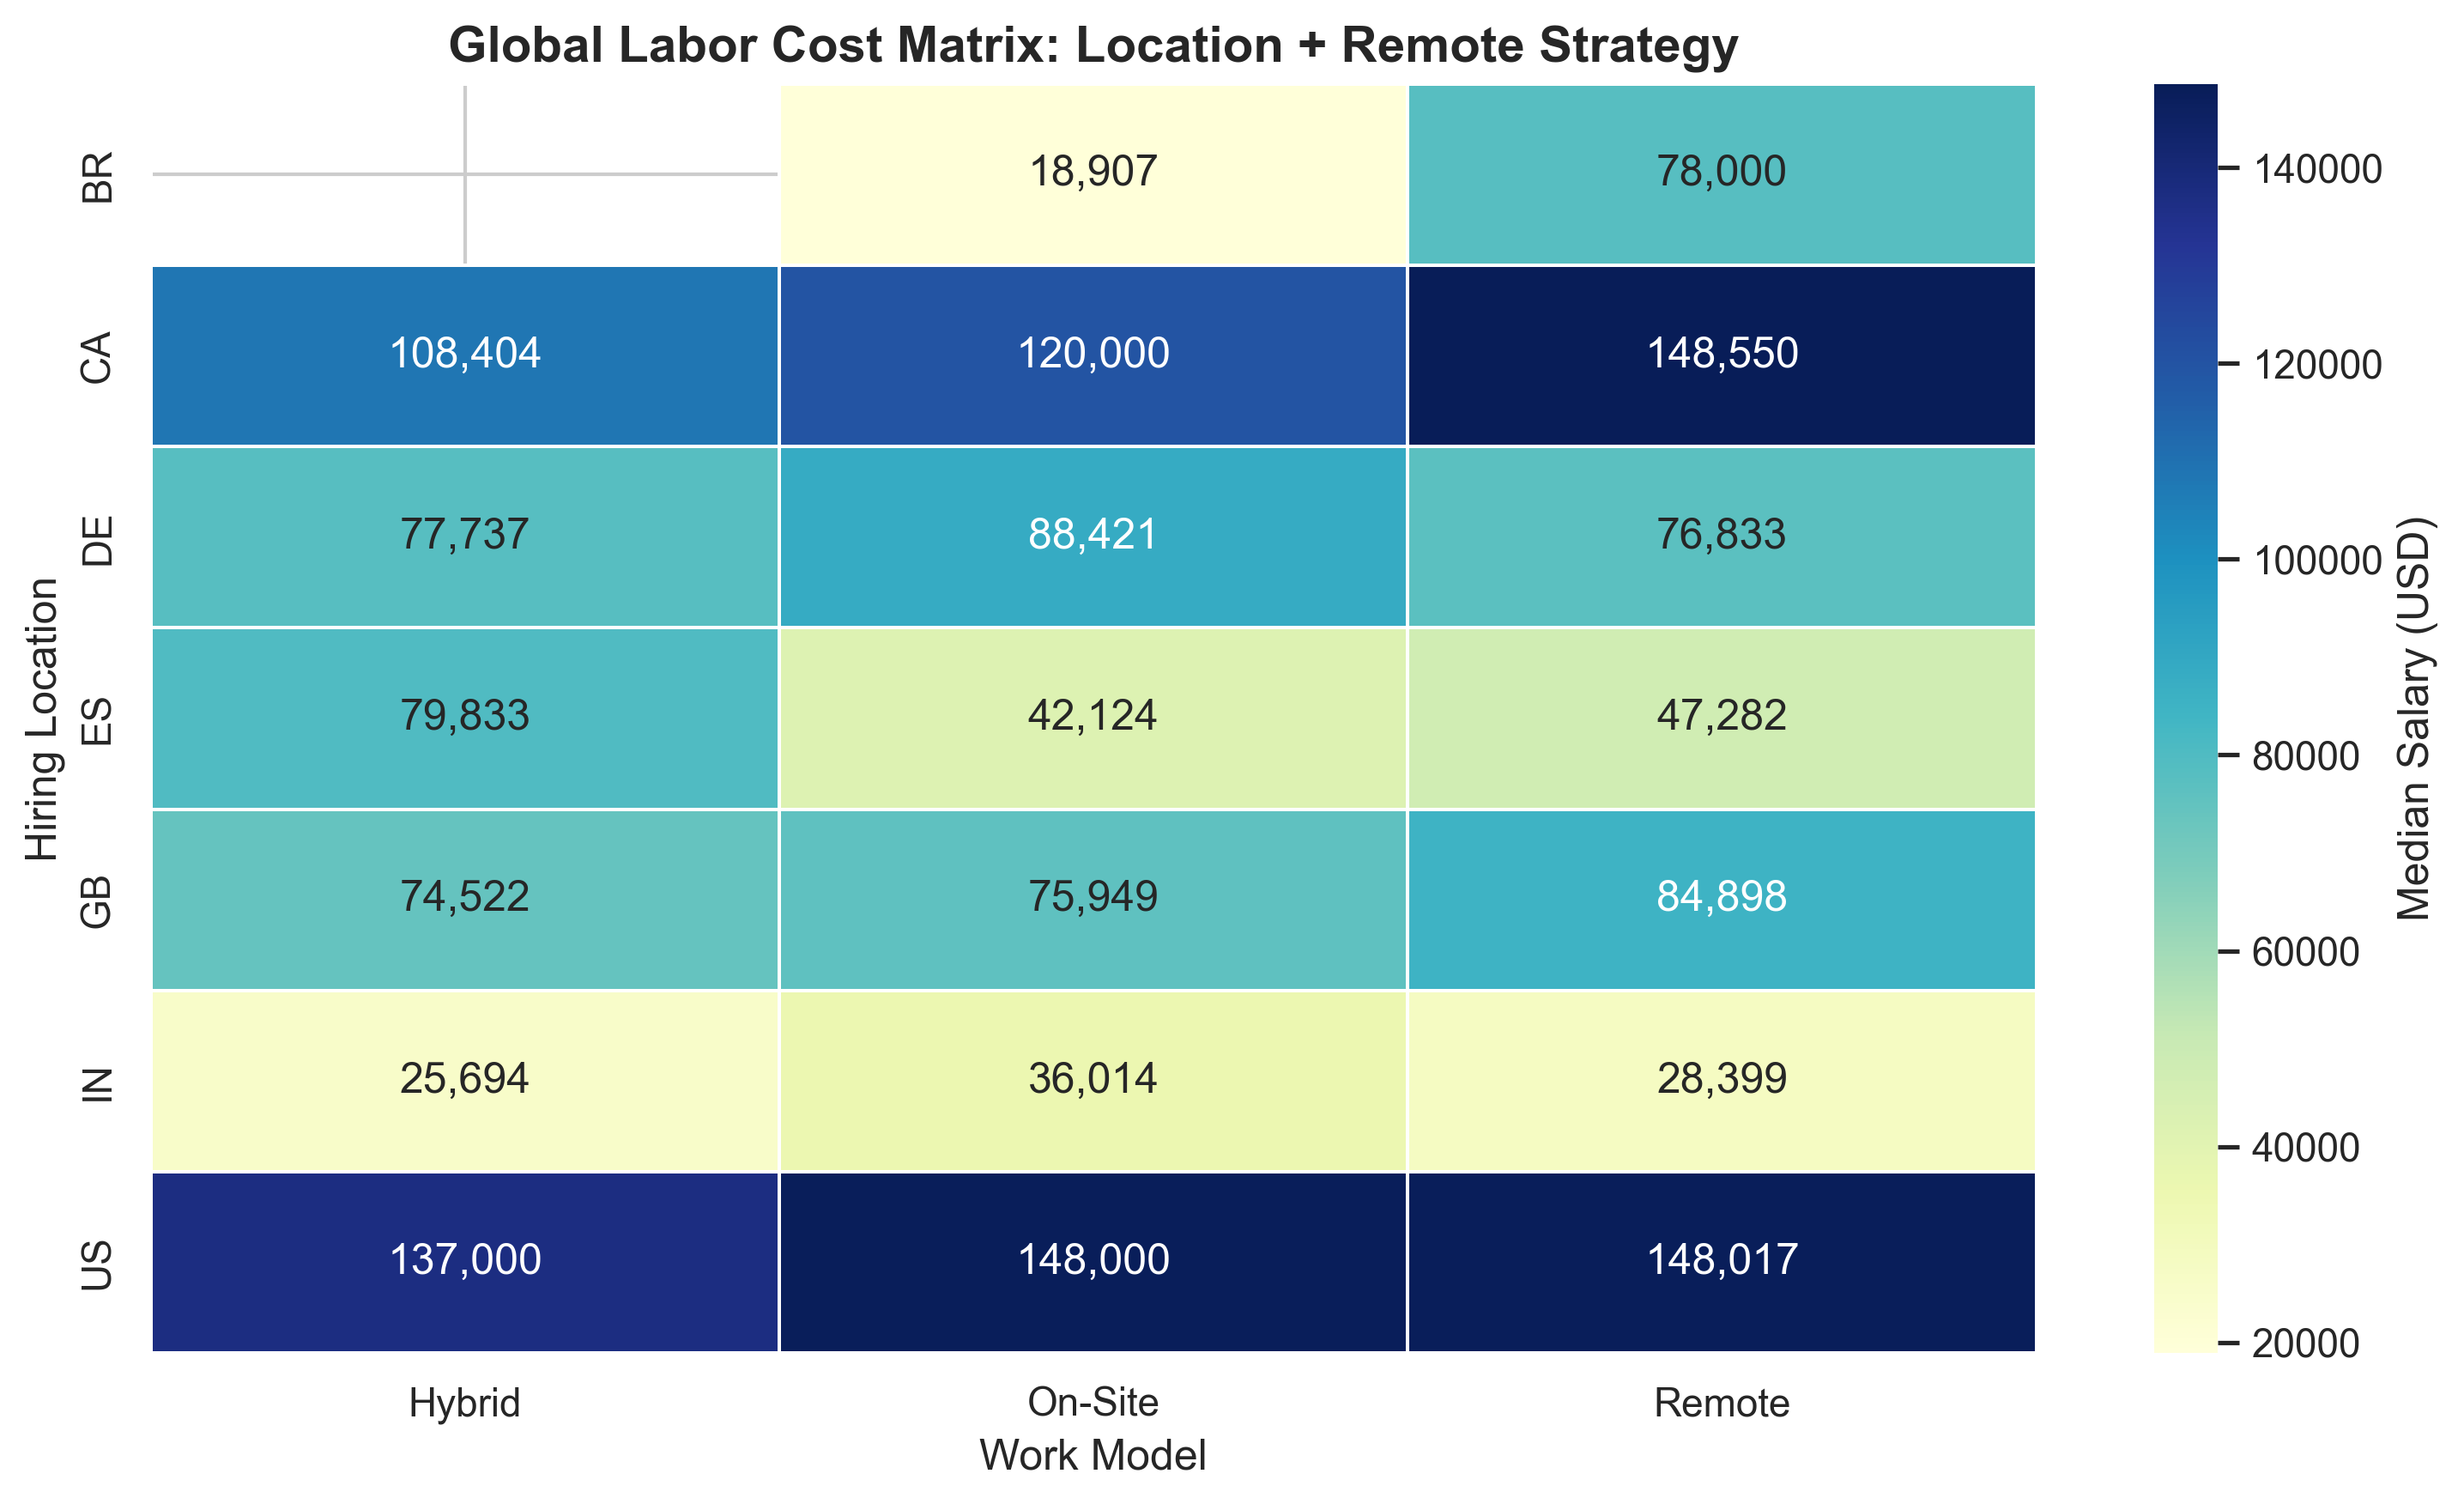

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Set style for professional report
sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.dpi': 300, 'font.family': 'sans-serif'})

# ------------------------------------------------------------------
# RQ1: Remote Work Salary Impact (Violin Plot)
# Why: A Violin Plot is superior to a boxplot here because it shows 
# the DENSITY of salaries. You can see if remote roles have a "fat" 
# tail (more high earners) compared to on-site.
# ------------------------------------------------------------------
plt.figure(figsize=(12, 6))
order = ['EN', 'MI', 'SE', 'EX']
# Convert remote_ratio to string labels for clarity
df['remote_label'] = df['remote_ratio'].replace({0: 'On-Site', 50: 'Hybrid', 100: 'Remote'})

sns.violinplot(data=df, x='experience_level', y='salary_in_usd', hue='remote_label', 
               order=order, split=False, inner="quartile", palette="muted")
plt.title('Impact of Remote Work on Salary Distribution by Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level (Entry -> Executive)')
plt.ylabel('Salary (USD)')
plt.legend(title='Work Mode')
plt.tight_layout()
plt.savefig('RQ1_Remote_Impact.png')
plt.show()

# ------------------------------------------------------------------
# RQ2: Geographic Salary Arbitrage (Diverging Bar Chart)
# Why: Instead of just showing salaries, we show the GAP relative to 
# the US. This visualizes "Arbitrage Opportunity" directly.
# ------------------------------------------------------------------
# Filter for top 15 countries by frequency to ensure statistical relevance
top_countries = df['company_location'].value_counts().head(15).index
df_geo = df[df['company_location'].isin(top_countries)]

# Calculate Median Salary per Country
country_stats = df_geo.groupby('company_location')['salary_in_usd'].median().sort_values()

# Calculate % Difference from US Median
us_median = country_stats['US']
diff_data = ((country_stats - us_median) / us_median) * 100

plt.figure(figsize=(10, 8))
colors = ['#2ecc71' if x < 0 else '#e74c3c' for x in diff_data.values] # Green = Savings
diff_data.plot(kind='barh', color=colors, width=0.7)
plt.axvline(0, color='black', linewidth=1)
plt.title(f'Geographic Salary Arbitrage: % Savings vs US Median (${us_median:,.0f})', fontsize=14, fontweight='bold')
plt.xlabel('% Difference from US Salary (Negative = Savings)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('RQ2_Geo_Arbitrage.png')
plt.show()

# ------------------------------------------------------------------
# RQ3: Cost-efficient Team Composition (Comparative Bar Chart)
# Why: We need a direct financial comparison. 1 Senior vs 2 Mids.
# ------------------------------------------------------------------
avg_sal = df.groupby('experience_level')['salary_in_usd'].mean()
cost_senior = avg_sal['SE']
cost_2_mids = avg_sal['MI'] * 2

plt.figure(figsize=(8, 5))
costs = [cost_senior, cost_2_mids]
labels = ['1 Senior Engineer\n(Higher Expertise)', '2 Mid-Level Engineers\n(More Bandwidth)']
bars = plt.bar(labels, costs, color=['#3498db', '#e67e22'], width=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Cost Efficiency Analysis: Expertise vs. Capacity', fontsize=14, fontweight='bold')
plt.ylabel('Total Annual Cost (USD)')
plt.ylim(0, max(costs)*1.15) # Add headroom for text
plt.tight_layout()
plt.savefig('RQ3_Team_Composition.png')
plt.show()

# ------------------------------------------------------------------
# RQ4: Combined Optimization Strategy (Scenario Heatmap)
# Why: A heatmap allows us to cross "Location" and "Remote Type" 
# to find the "Sweet Spot" (Dark Blue = High Cost, Light = Low Cost).
# ------------------------------------------------------------------
# Select key regions for strategy: High Cost (US), Mid (DE/GB), Low (IN/ES/BR)
# Note: Adjust country codes based on what exists in your data
target_countries = ['US', 'GB', 'DE', 'CA', 'ES', 'IN', 'BR'] 
df_strat = df[df['company_location'].isin(target_countries)].copy()

# Pivot table for heatmap
pivot = df_strat.pivot_table(index='company_location', columns='remote_label', 
                             values='salary_in_usd', aggfunc='median')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=",.0f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Median Salary (USD)'})
plt.title('Global Labor Cost Matrix: Location + Remote Strategy', fontsize=14, fontweight='bold')
plt.ylabel('Hiring Location')
plt.xlabel('Work Model')
plt.tight_layout()
plt.savefig('RQ4_Optimization_Matrix.png')
plt.show()

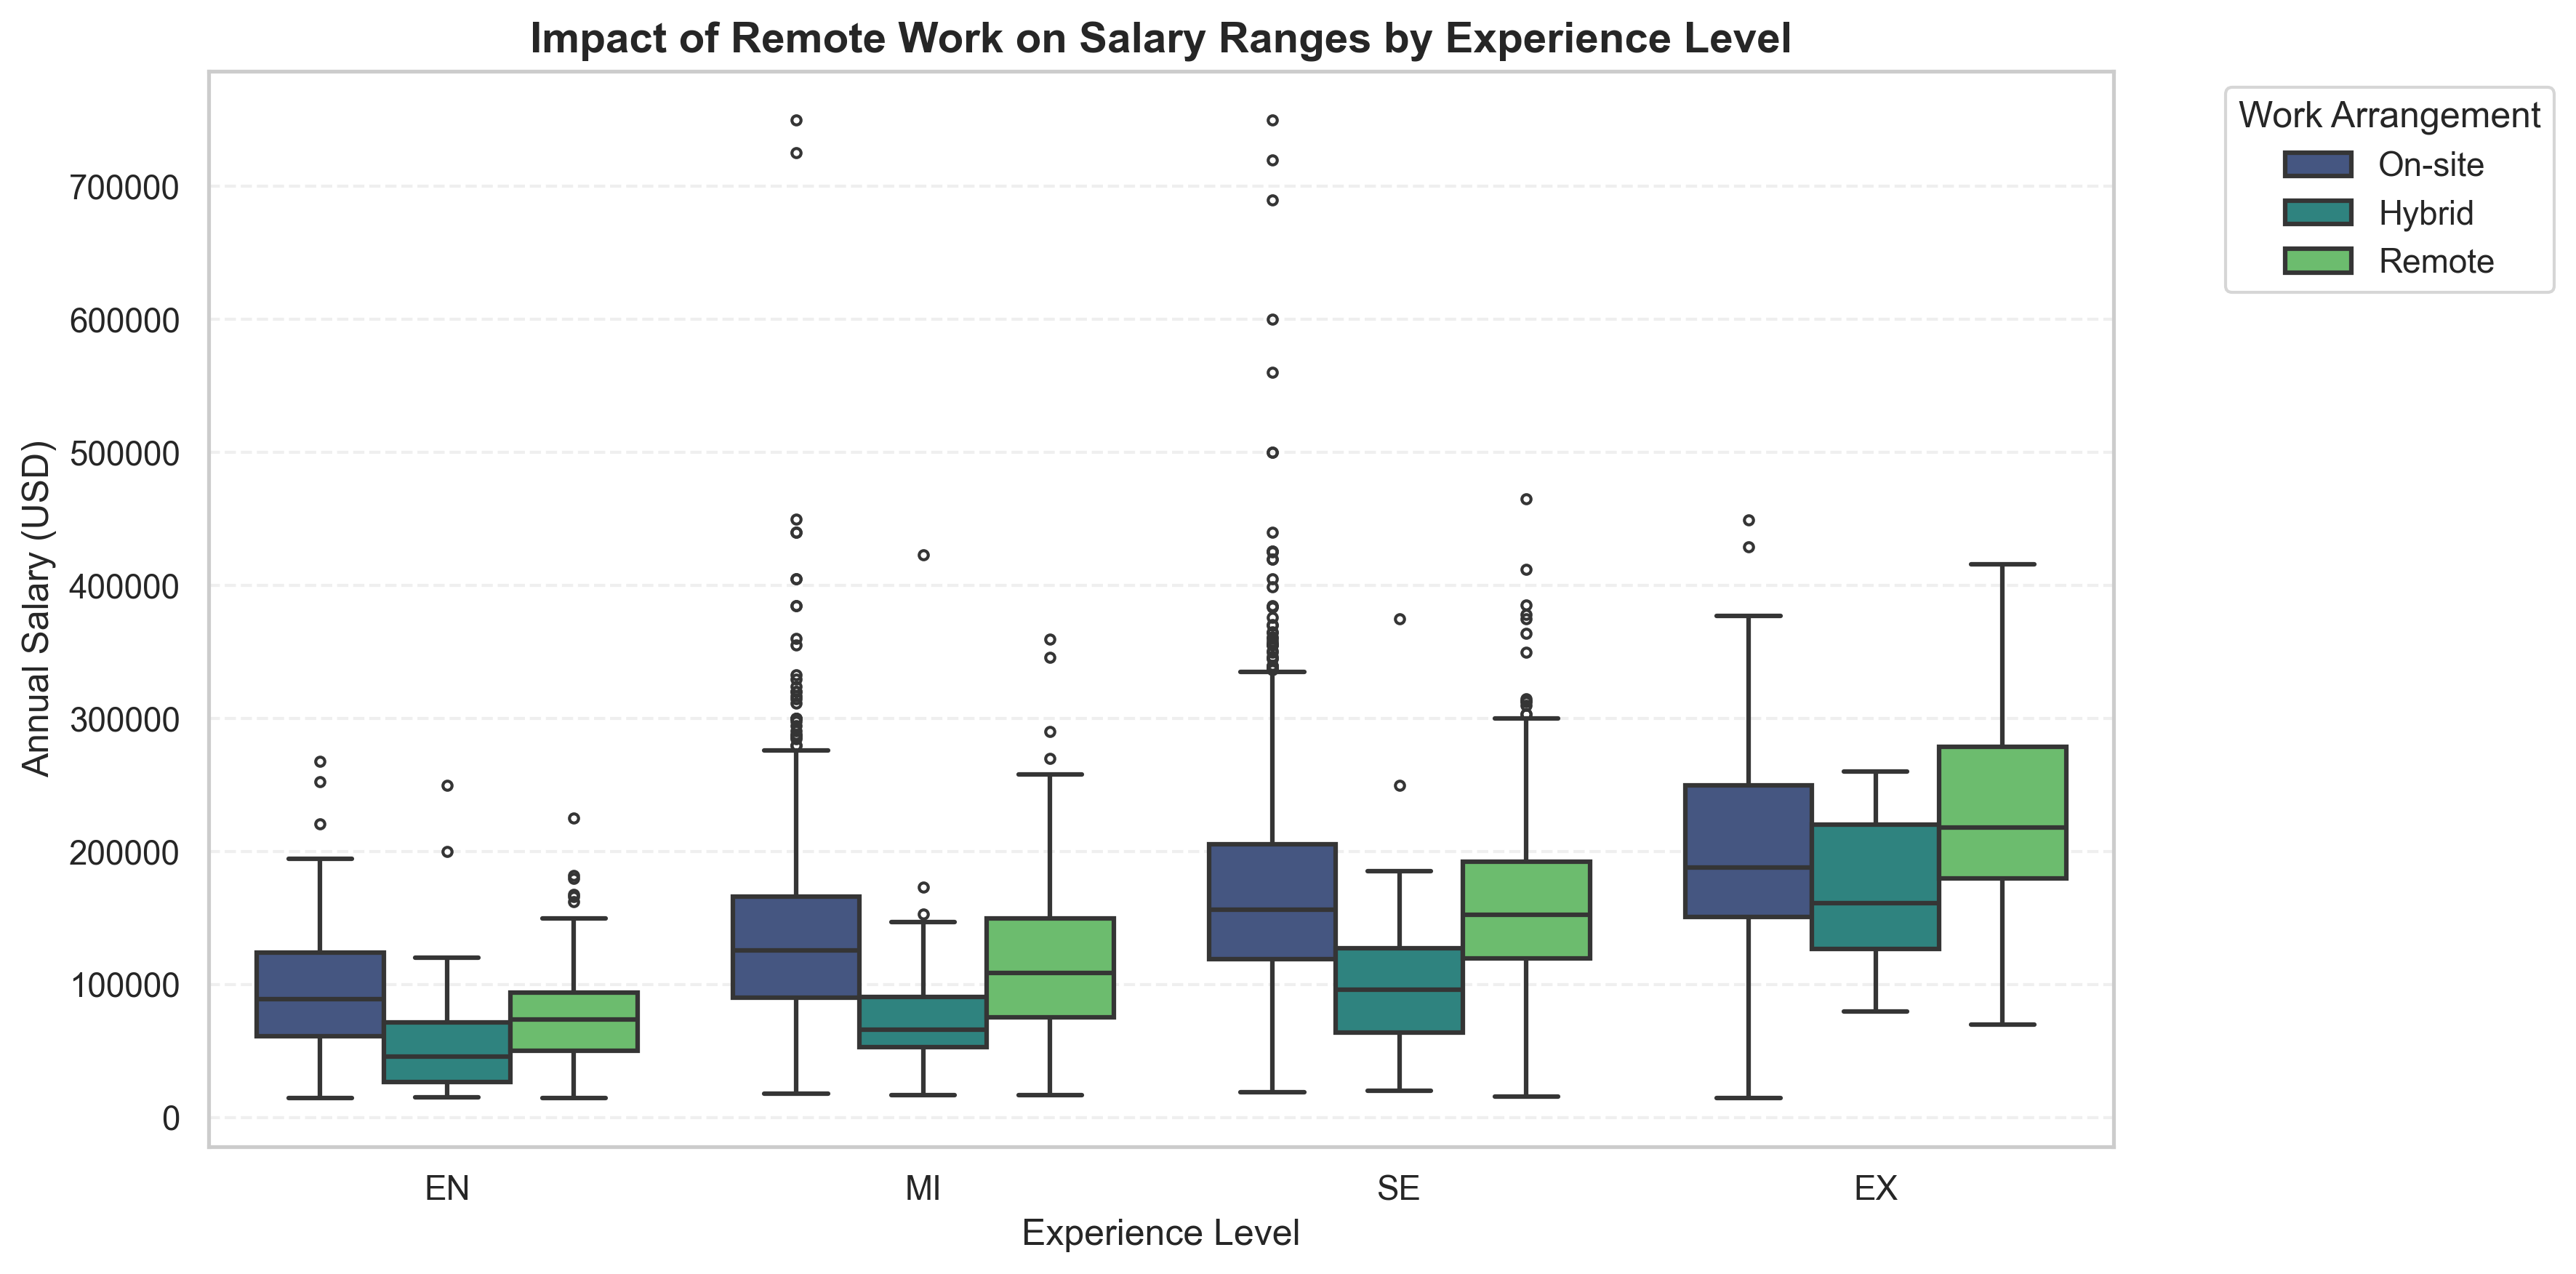

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Preprocessing
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

# 3. Order Experience Logic
exp_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'], categories=exp_order, ordered=True)

# 4. Generate the Professional Boxplot
plt.figure(figsize=(12, 6))

# Use a distinct palette to separate the work models visually
sns.boxplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    hue='work_model', 
    hue_order=['On-site', 'Hybrid', 'Remote'],
    palette="viridis",  # Professional, colorblind-friendly palette
    linewidth=1.5,      # Thicker lines for readability
    fliersize=3         # Smaller outlier dots to avoid clutter
)

plt.title('Impact of Remote Work on Salary Ranges by Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Annual Salary (USD)', fontsize=12)
plt.xlabel('Experience Level', fontsize=12)
plt.legend(title='Work Arrangement', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside if crowded
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('RQ1_Remote_Impact_Boxplot.png', dpi=300)
plt.show()

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\3082234359.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


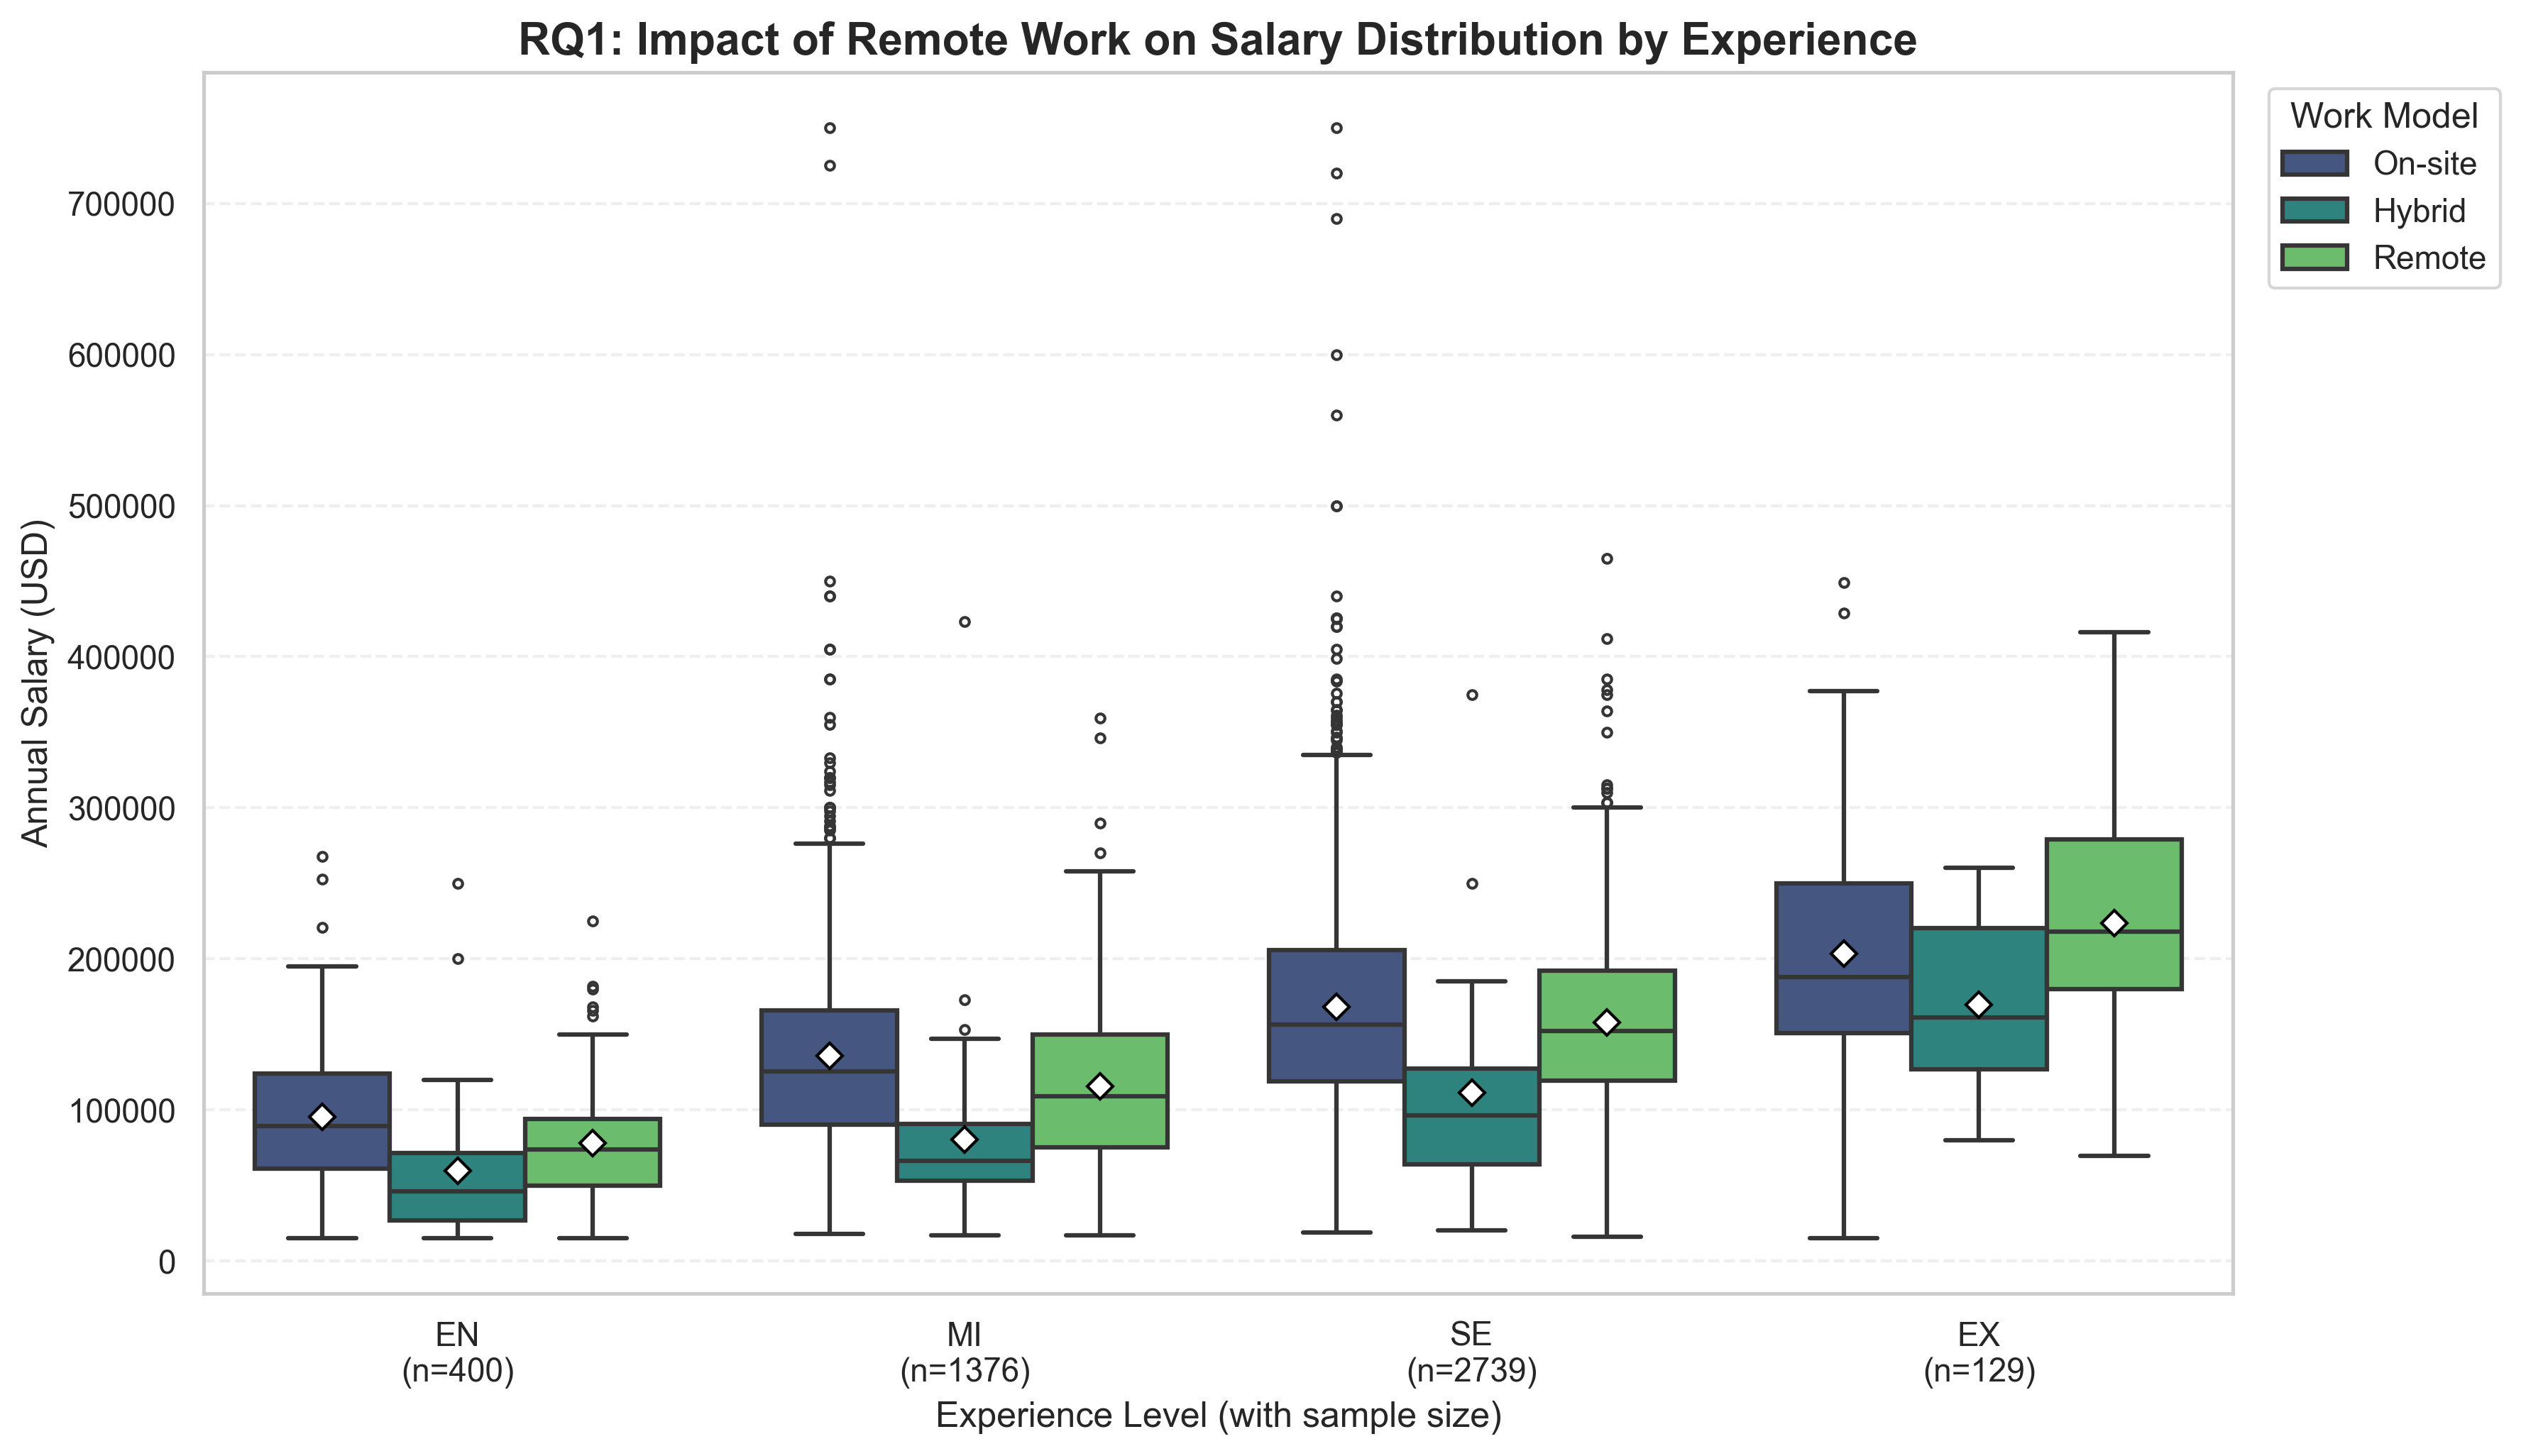

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Preprocessing
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})
exp_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'], categories=exp_order, ordered=True)

# ---------------------------------------------------------
# CHART 1: Grouped Box Plot (Distribution & Interaction)
# ---------------------------------------------------------
plt.figure(figsize=(12, 7))

# Create Box Plot with Mean Markers
# palette="viridis" creates a professional gradient (Green -> Blue -> Purple)
ax = sns.boxplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    hue='work_model', 
    hue_order=['On-site', 'Hybrid', 'Remote'],
    palette="viridis",
    linewidth=1.5,
    fliersize=3,      # Small outlier dots
    showmeans=True,   # Add mean markers (Crucial for cost analysis)
    meanprops={"marker":"D", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":6}
)

# Add Sample Sizes (n) to X-axis Labels
# This adds context: "EN (n=400)" shows data reliability
n_exp = df['experience_level'].value_counts()
new_labels = [f"{lvl}\n(n={n_exp[lvl]})" for lvl in exp_order]
ax.set_xticklabels(new_labels)

# Formatting
plt.title('RQ1: Impact of Remote Work on Salary Distribution by Experience', fontsize=15, fontweight='bold')
plt.ylabel('Annual Salary (USD)', fontsize=12)
plt.xlabel('Experience Level (with sample size)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.legend(title='Work Model', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.savefig('RQ1_Chart1_Grouped_Boxplot.png', dpi=300)
plt.show()

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\480826134.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['experience_level', 'work_model'])['salary_in_usd'].mean().unstack()


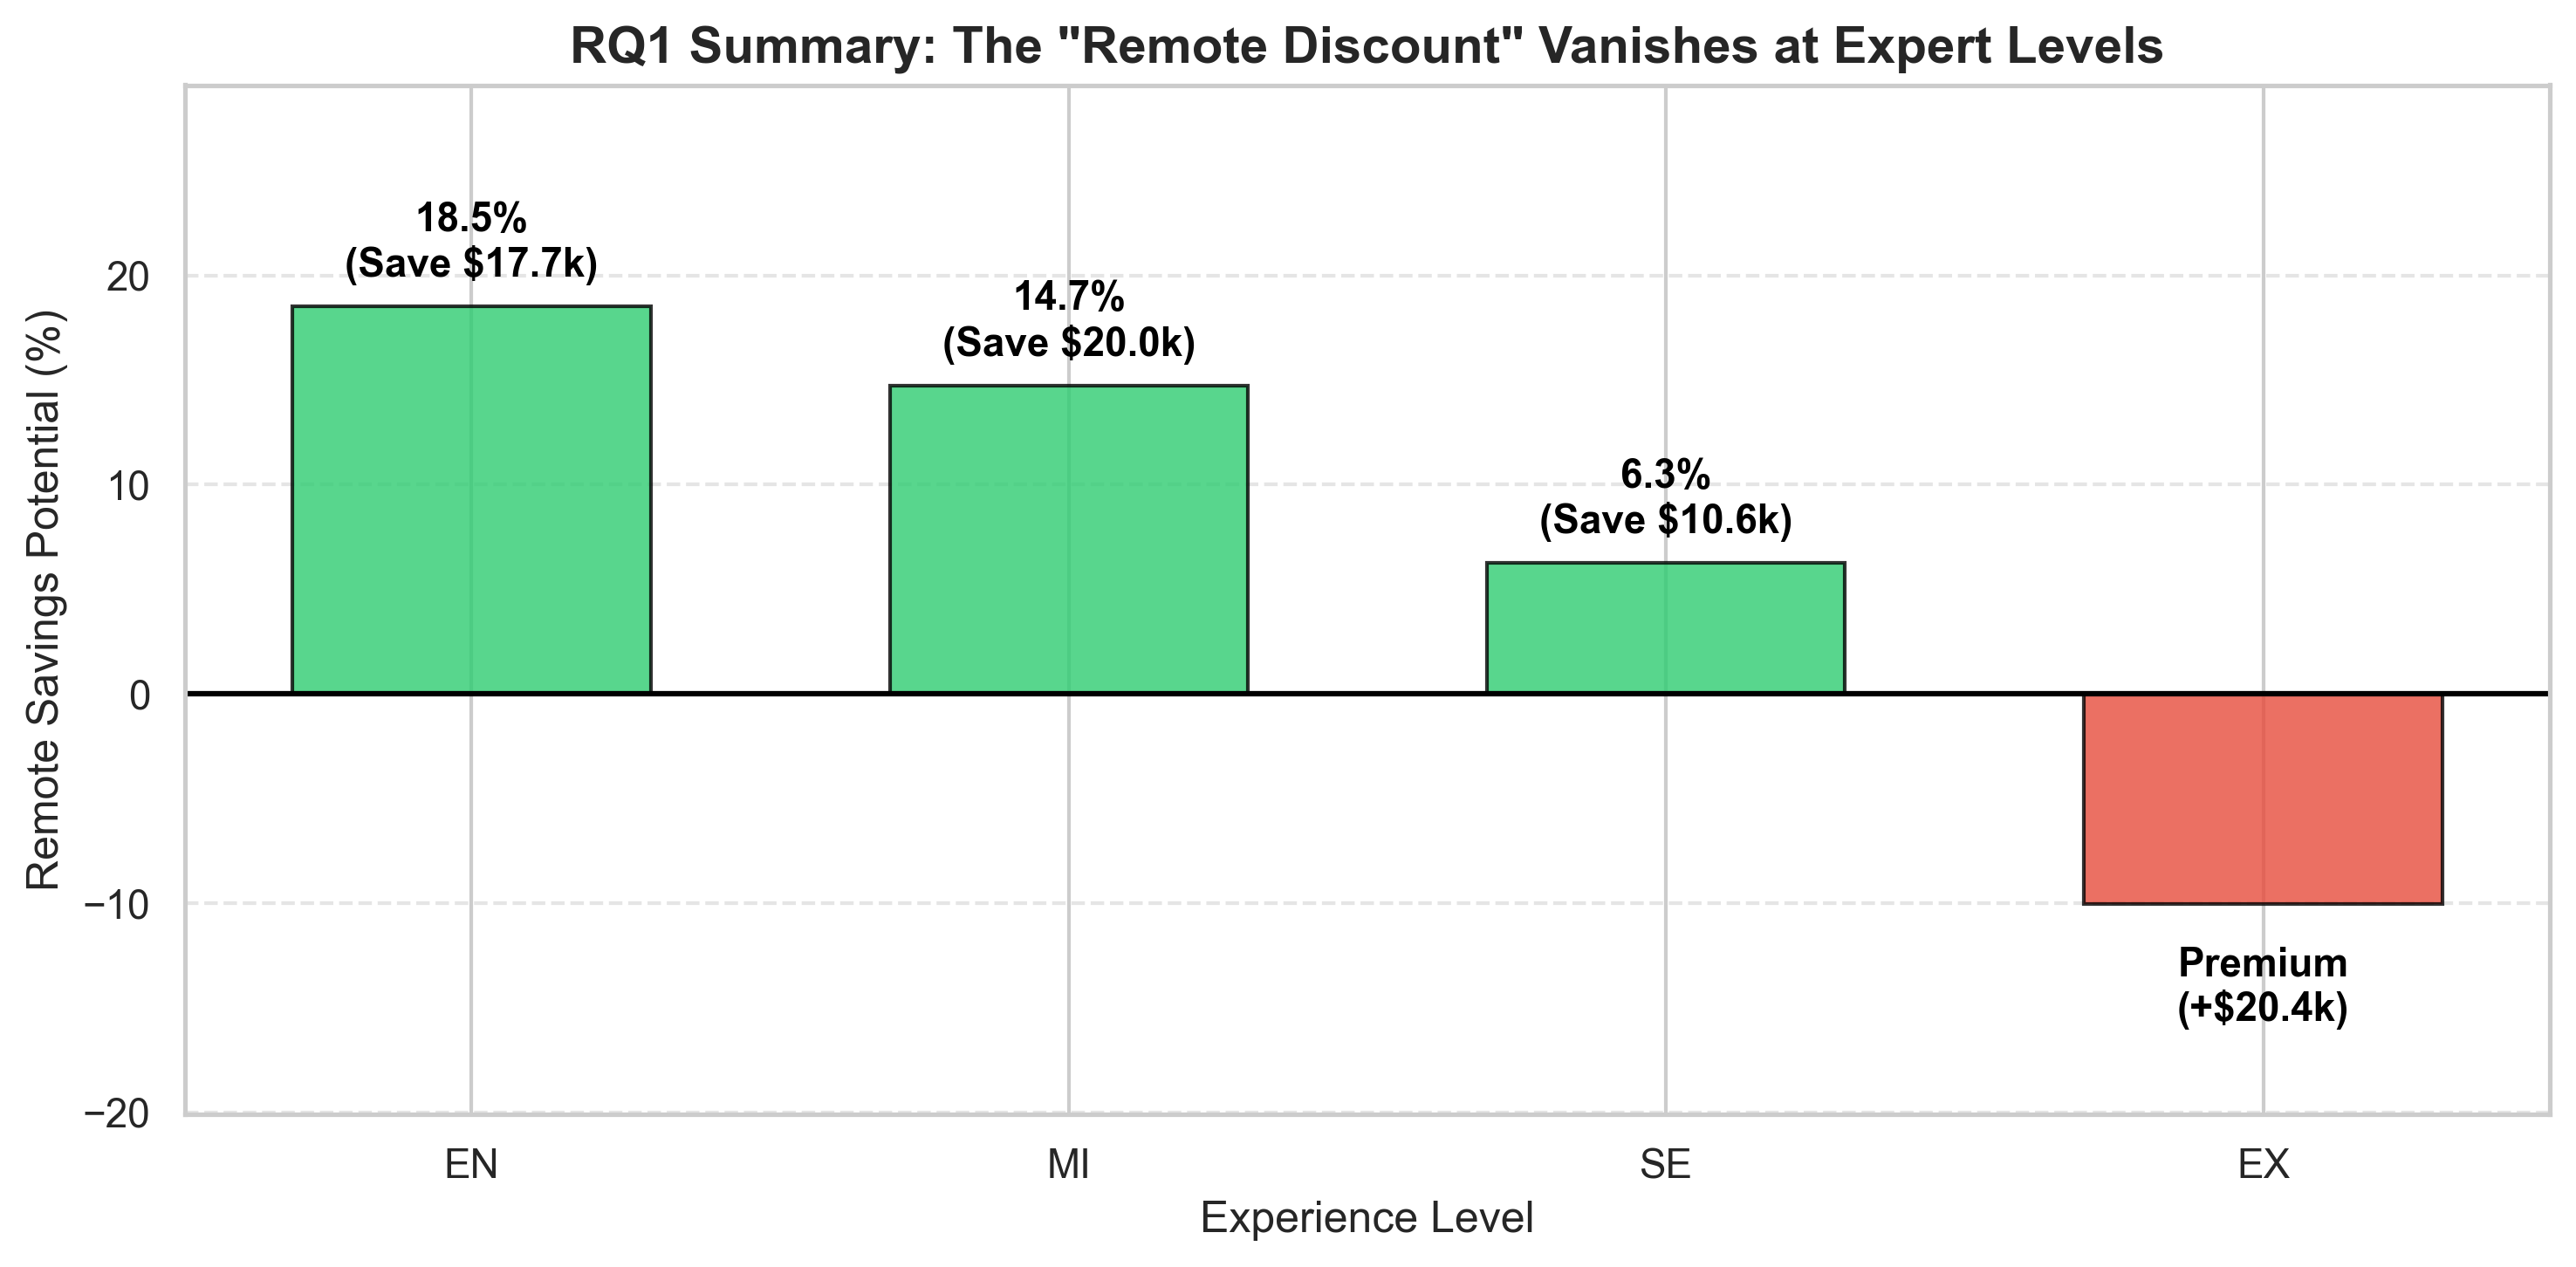


--- Summary Table Data (For Report Text) ---
work_model          On-site     Remote  Diff_USD  Pct_Discount
experience_level                                              
EN                 95545.31   77839.44  17705.87         18.53
MI                135670.48  115661.47  20009.01         14.75
SE                168371.09  157813.36  10557.73          6.27
EX                203278.47  223708.92 -20430.46        -10.05


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data & Preprocess (if running separately)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})
exp_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'], categories=exp_order, ordered=True)

# ---------------------------------------------------------
# CHART 2: Summary Analysis (The "Discount" Chart)
# ---------------------------------------------------------
# 1. Calculate the precise numbers for the Table
summary = df.groupby(['experience_level', 'work_model'])['salary_in_usd'].mean().unstack()
summary = summary[['On-site', 'Remote']] # Focus on binary comparison
summary['Diff_USD'] = summary['On-site'] - summary['Remote']
summary['Pct_Discount'] = (summary['Diff_USD'] / summary['On-site']) * 100

# 2. Visual: Bar Chart of Discount %
plt.figure(figsize=(10, 5))

# Logic: Green if Remote is cheaper (Savings), Red if Remote is expensive (Premium)
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in summary['Pct_Discount']]
bars = plt.bar(summary.index, summary['Pct_Discount'], color=colors, width=0.6, edgecolor='black', alpha=0.8)

# Add baseline
plt.axhline(0, color='black', linewidth=1.5)

# 3. Add the "Table Data" as Labels on the Bars
for bar, label_idx in zip(bars, summary.index):
    height = bar.get_height()
    diff_val = summary.loc[label_idx, 'Diff_USD']
    
    # Format: "18.5%\n(-$17.7k)"
    if height > 0: # Savings
        label_text = f"{height:.1f}%\n(Save ${diff_val/1000:.1f}k)"
        y_pos = height + 1
        va = 'bottom'
    else: # Premium
        label_text = f"Premium\n(+${abs(diff_val)/1000:.1f}k)"
        y_pos = height - 2
        va = 'top'
        
    plt.text(bar.get_x() + bar.get_width()/2., y_pos,
             label_text, ha='center', va=va, fontsize=11, fontweight='bold', color='black')

# Formatting
plt.title('RQ1 Summary: The "Remote Discount" Vanishes at Expert Levels', fontsize=14, fontweight='bold')
plt.ylabel('Remote Savings Potential (%)', fontsize=12)
plt.xlabel('Experience Level', fontsize=12)
plt.ylim(min(summary['Pct_Discount'])*1.5 - 5, max(summary['Pct_Discount'])*1.3 + 5) # Dynamic headroom
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('RQ1_Chart2_Summary_Discount.png', dpi=300)
plt.show()

# Print Table for verification
print("\n--- Summary Table Data (For Report Text) ---")
print(summary.round(2))

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\4235329442.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_counts = df.groupby(['experience_level', 'work_model']).size().unstack(fill_value=0)
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\4235329442.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


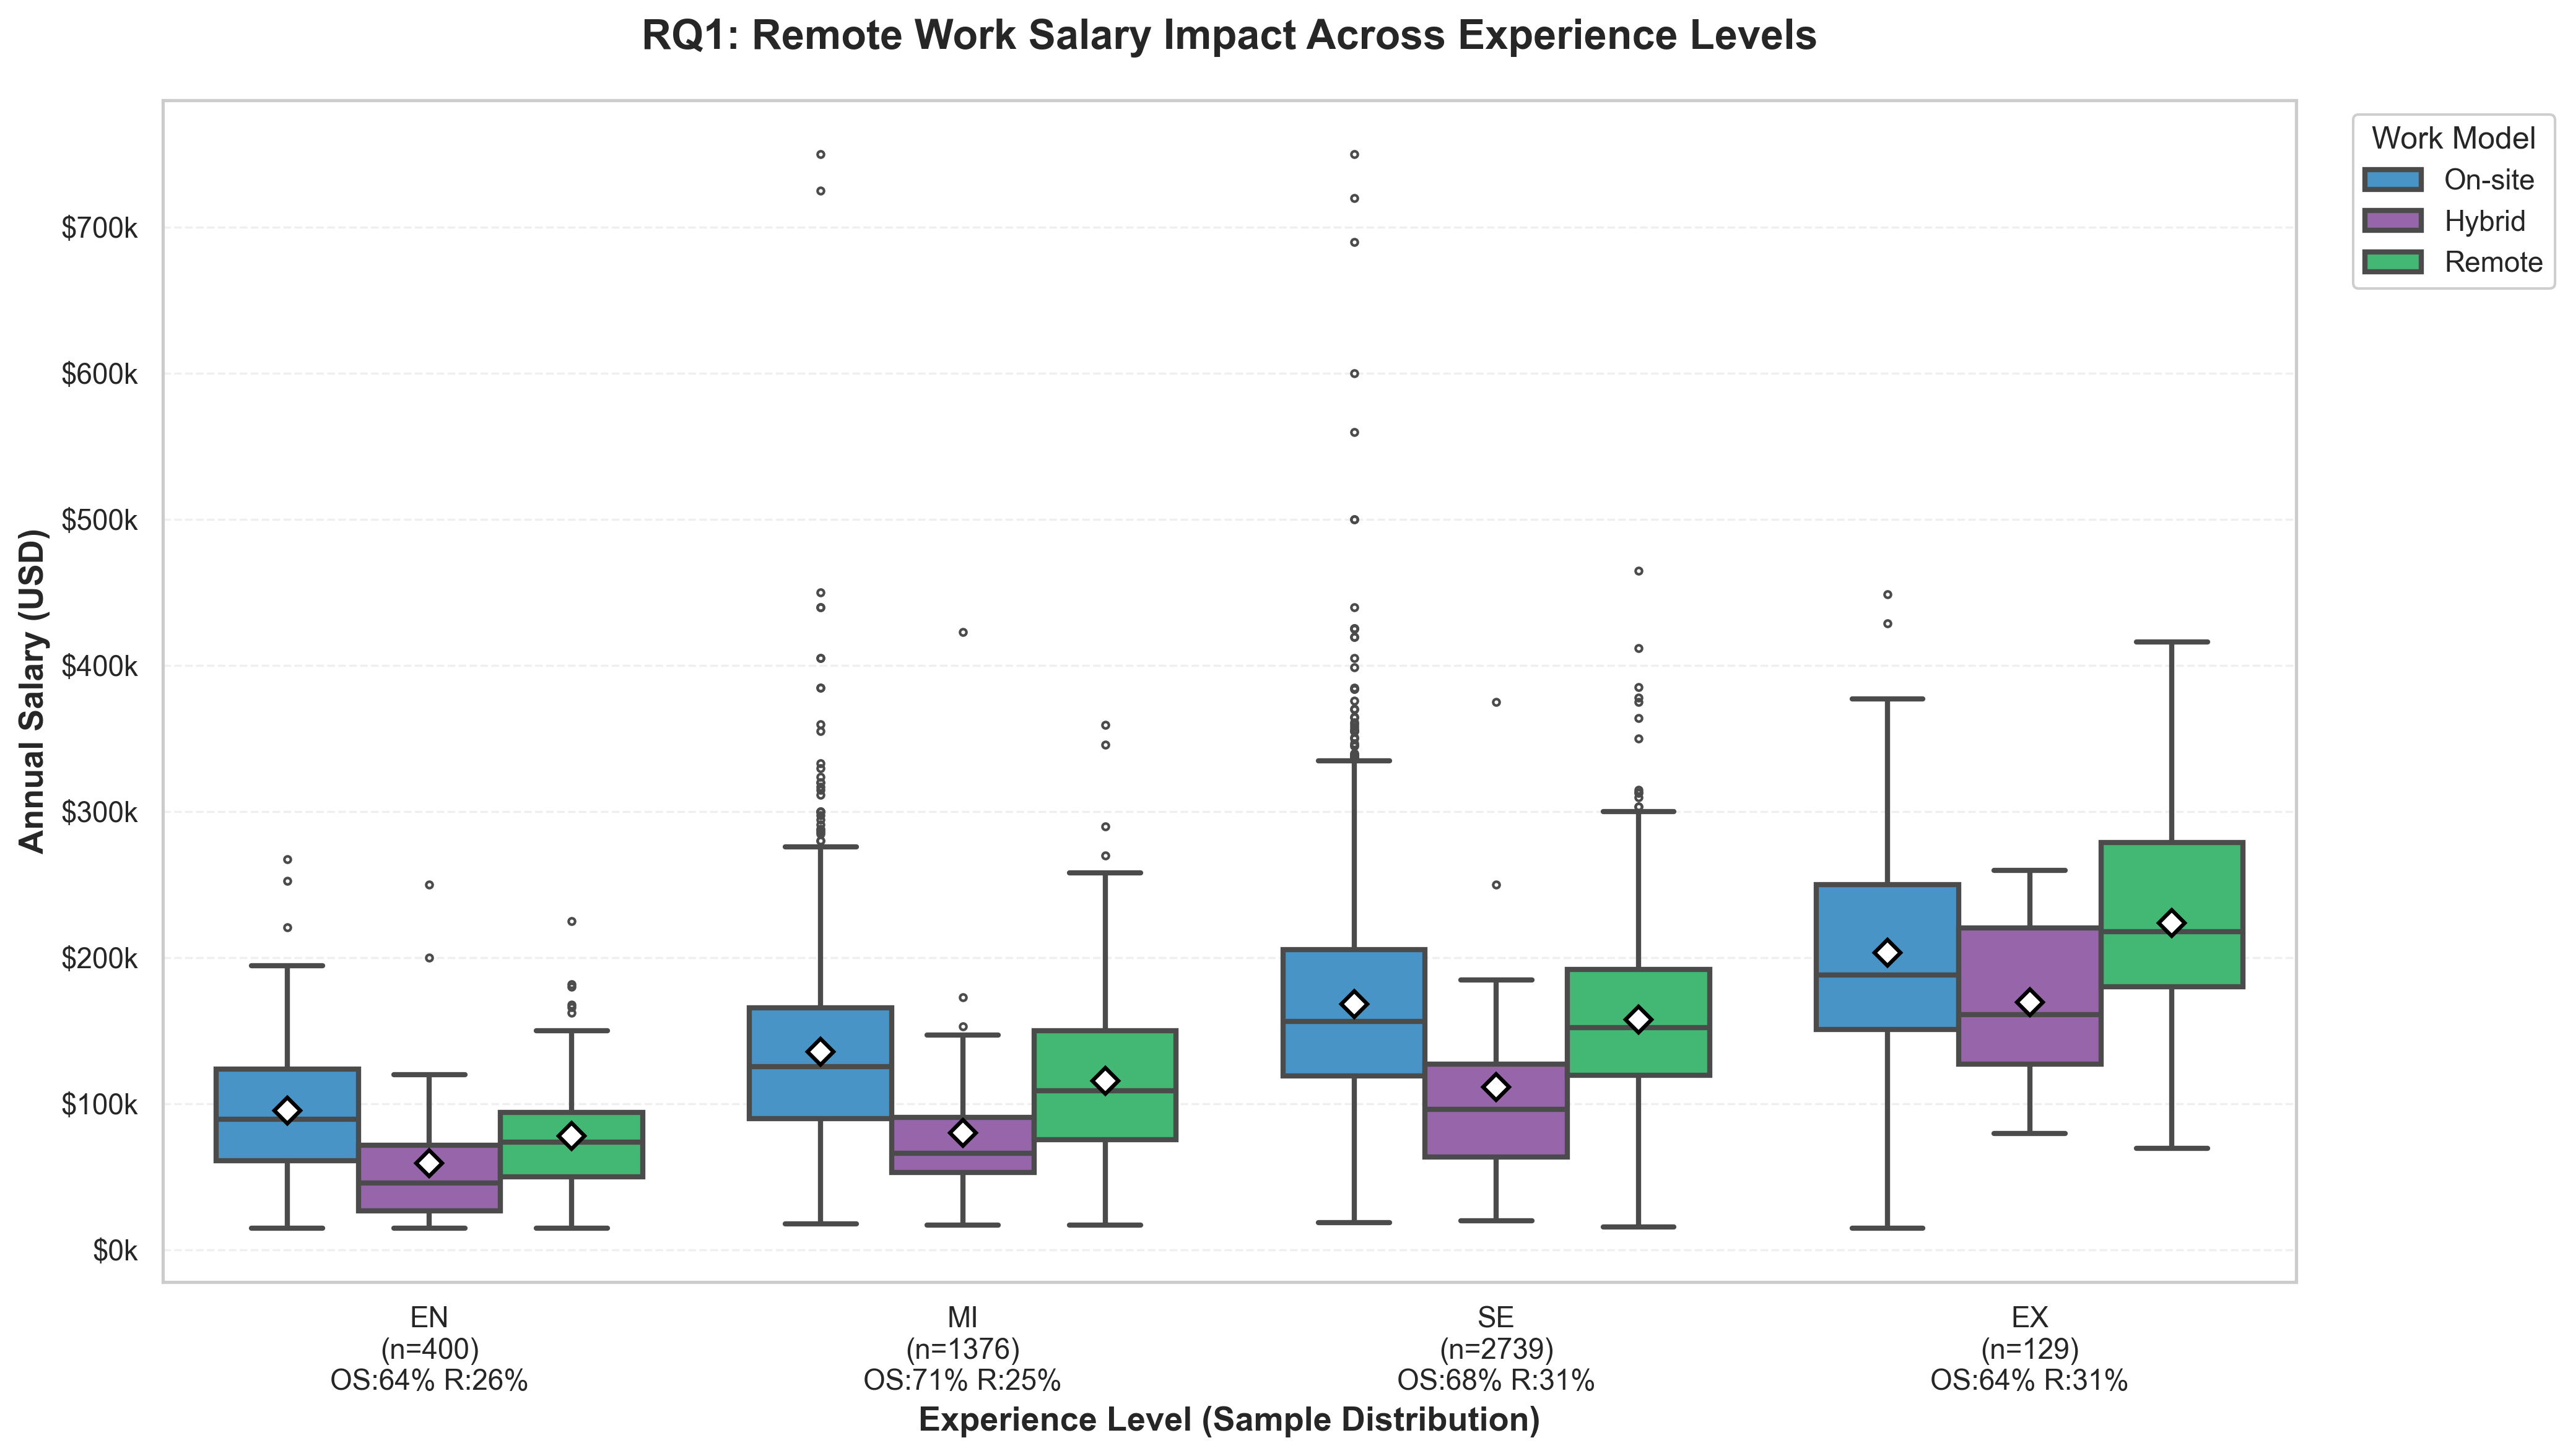

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6372\4235329442.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['experience_level', 'work_model'])['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)


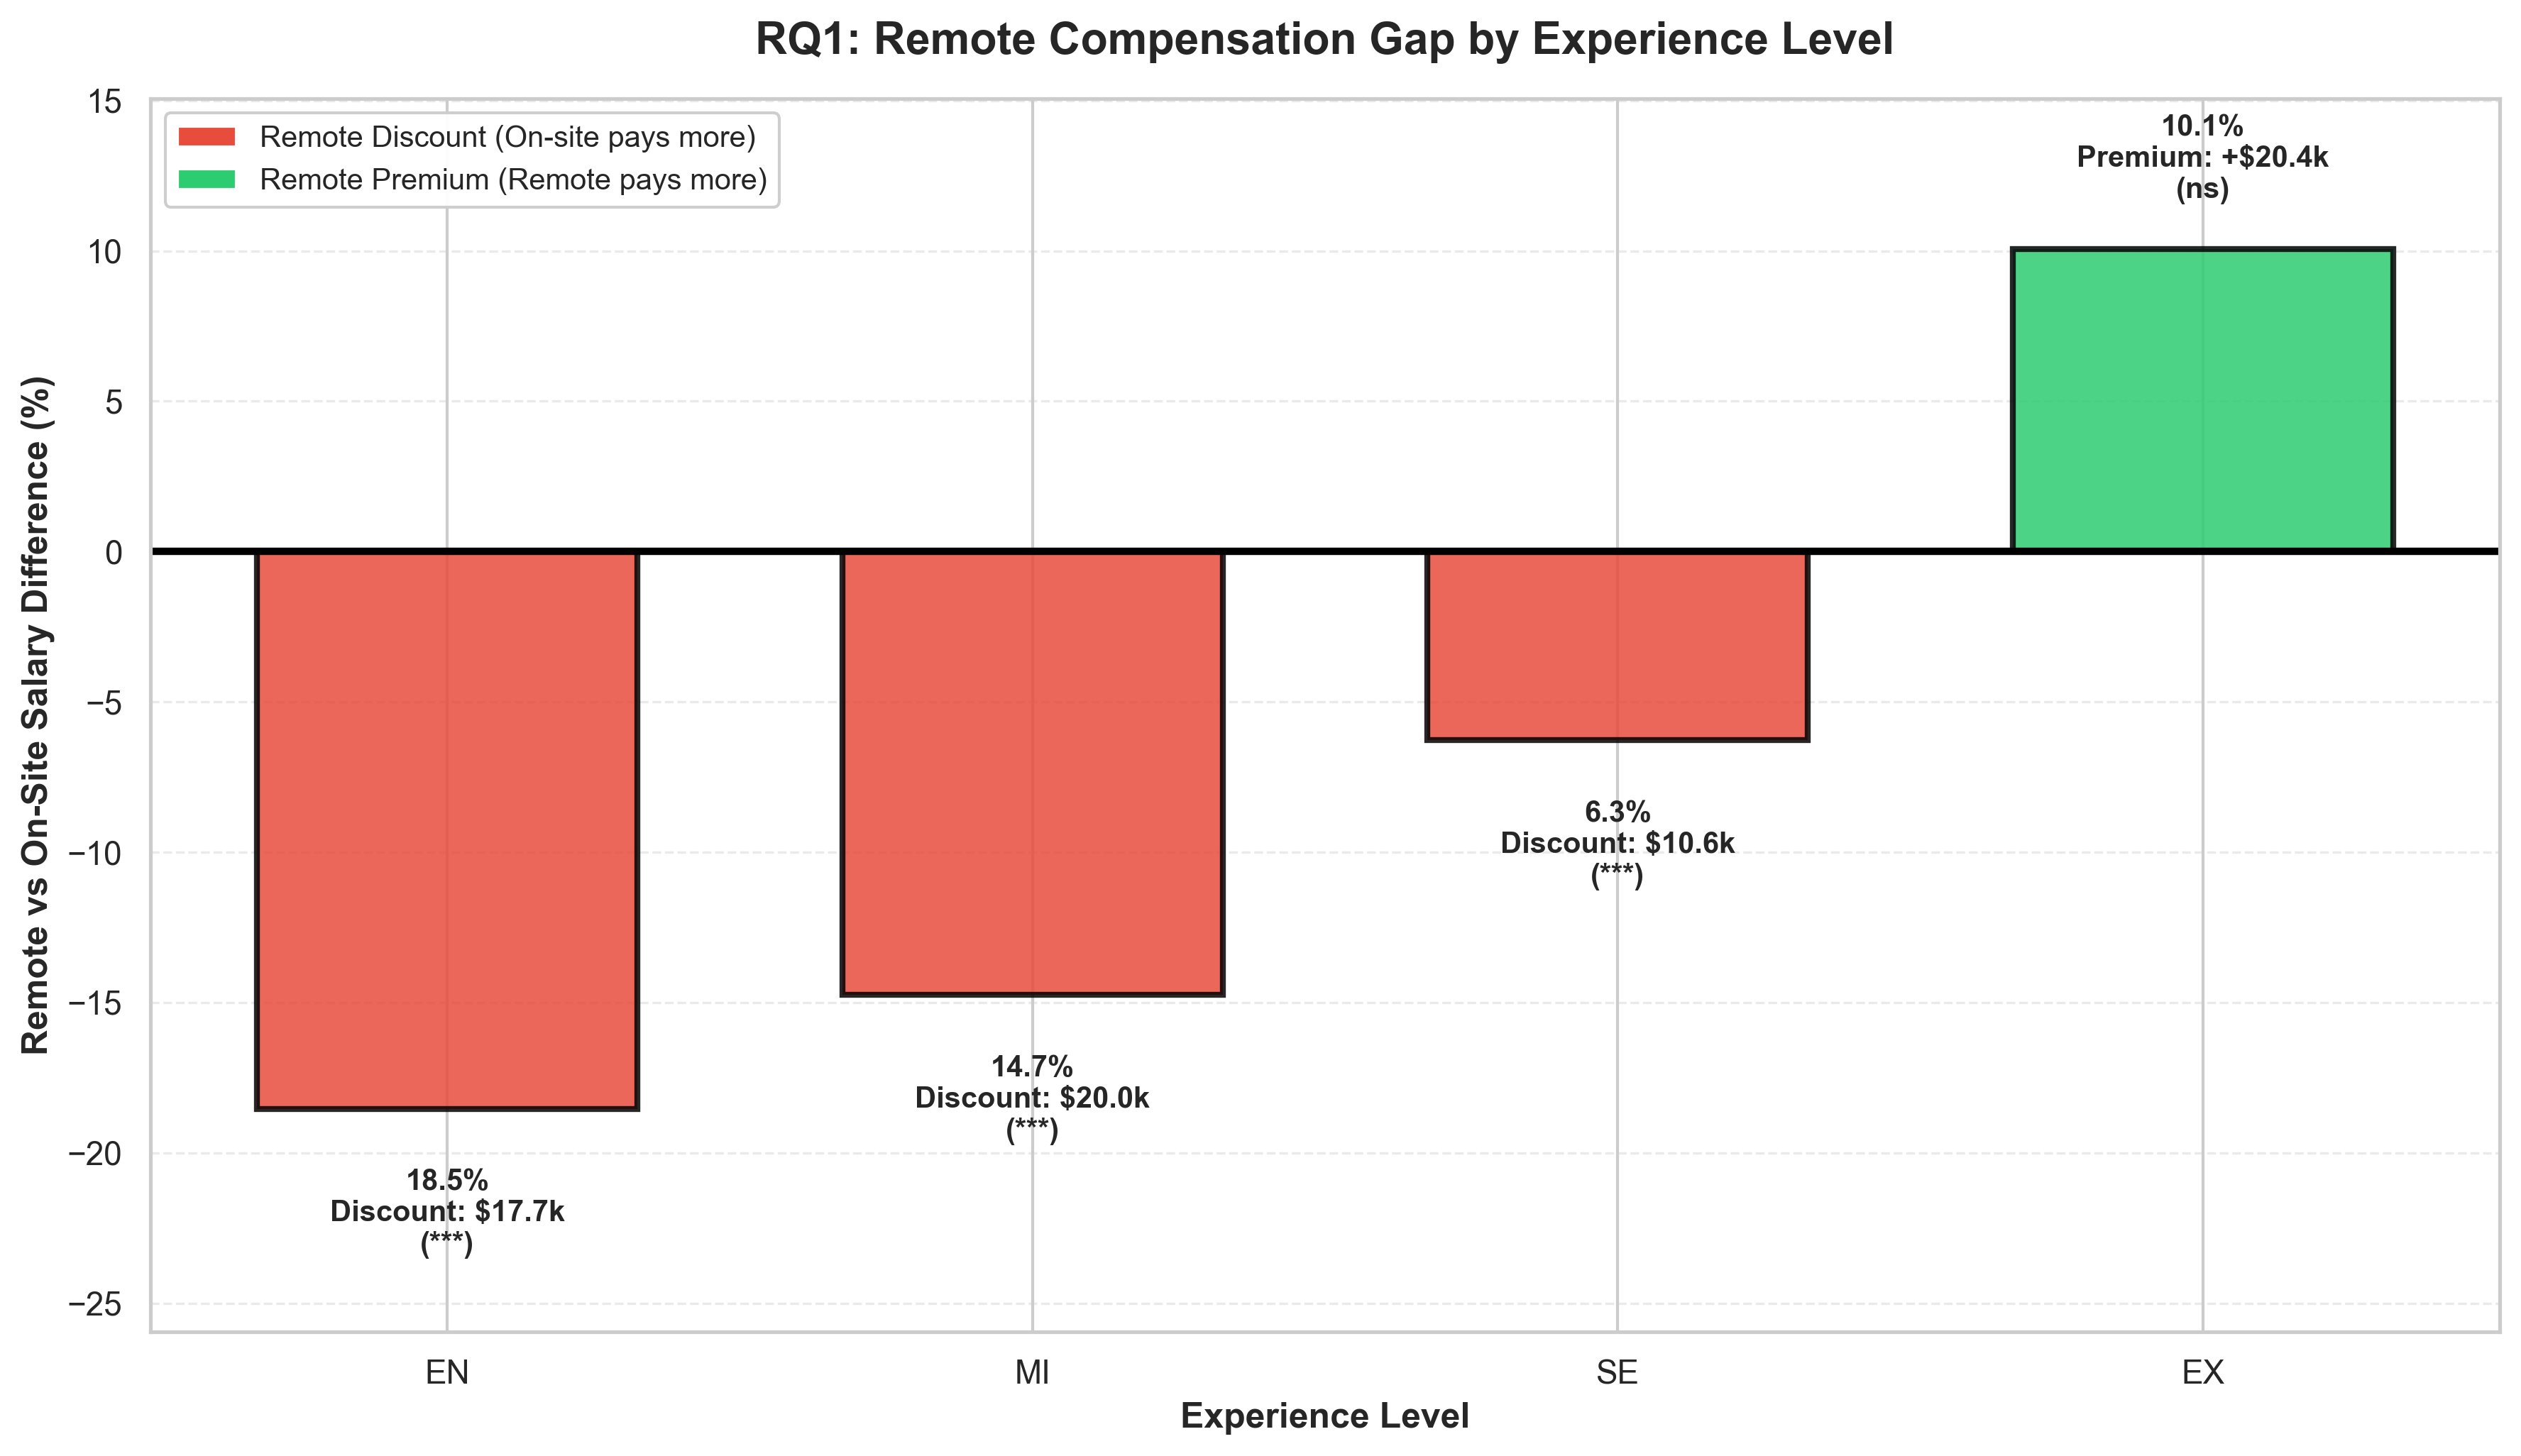


RQ1 SUMMARY: Remote Work Salary Analysis

Experience   On-Site Avg     Remote Avg      Difference      % Diff     p-value   
--------------------------------------------------------------------------------
EN           $      95,545 $       77,839 $      -17,706    -18.5%    0.0004 ***
MI           $     135,670 $      115,661 $      -20,009    -14.7%    0.0000 ***
SE           $     168,371 $      157,813 $      -10,558     -6.3%    0.0002 ***
EX           $     203,278 $      223,709 $       20,430     10.1%    0.1517 ns

*** = p < 0.05 (statistically significant), ns = not significant

Key Insight: Remote discount REVERSES at Expert level (10% premium)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load and preprocess data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df['work_model'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})
exp_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'], categories=exp_order, ordered=True)

# =============================================================================
# CHART 1: Enhanced Grouped Box Plot
# =============================================================================
fig, ax = plt.subplots(figsize=(14, 8))

# Create box plot with enhanced styling
bp = sns.boxplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    hue='work_model', 
    hue_order=['On-site', 'Hybrid', 'Remote'],
    palette=["#3498db", "#9b59b6", "#2ecc71"],  # Blue, Purple, Green
    linewidth=2,
    fliersize=2.5,
    showmeans=True,
    meanprops={
        "marker": "D", 
        "markerfacecolor": "white", 
        "markeredgecolor": "black", 
        "markersize": 7,
        "markeredgewidth": 1.5
    },
    ax=ax
)

# Add sample sizes with percentages
work_counts = df.groupby(['experience_level', 'work_model']).size().unstack(fill_value=0)
total_counts = df['experience_level'].value_counts()

labels = []
for lvl in exp_order:
    total = total_counts[lvl]
    onsite_pct = (work_counts.loc[lvl, 'On-site'] / total * 100) if lvl in work_counts.index else 0
    remote_pct = (work_counts.loc[lvl, 'Remote'] / total * 100) if lvl in work_counts.index else 0
    labels.append(f"{lvl}\n(n={total})\nOS:{onsite_pct:.0f}% R:{remote_pct:.0f}%")

ax.set_xticklabels(labels)

# Enhanced formatting
ax.set_title('RQ1: Remote Work Salary Impact Across Experience Levels', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Annual Salary (USD)', fontsize=13, fontweight='bold')
ax.set_xlabel('Experience Level (Sample Distribution)', fontsize=13, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))
ax.grid(True, axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.legend(title='Work Model', title_fontsize=12, fontsize=11, 
          bbox_to_anchor=(1.02, 1), loc='upper left', framealpha=0.95)

plt.tight_layout()
plt.savefig('RQ1_Chart1_Enhanced_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# CHART 2: Corrected Remote Compensation Difference Analysis
# =============================================================================

# Calculate statistics
summary = df.groupby(['experience_level', 'work_model'])['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)
pivot_mean = summary['mean'].unstack()[['On-site', 'Remote']]
pivot_mean['Difference_USD'] = pivot_mean['Remote'] - pivot_mean['On-site']
pivot_mean['Pct_Difference'] = (pivot_mean['Difference_USD'] / pivot_mean['On-site']) * 100

# Statistical significance testing (t-tests)
p_values = []
for exp in exp_order:
    onsite_data = df[(df['experience_level'] == exp) & (df['work_model'] == 'On-site')]['salary_in_usd']
    remote_data = df[(df['experience_level'] == exp) & (df['work_model'] == 'Remote')]['salary_in_usd']
    if len(onsite_data) > 0 and len(remote_data) > 0:
        _, p_val = stats.ttest_ind(onsite_data, remote_data)
        p_values.append(p_val)
    else:
        p_values.append(np.nan)

pivot_mean['p_value'] = p_values
pivot_mean['significant'] = pivot_mean['p_value'] < 0.05

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in pivot_mean['Pct_Difference']]
bars = ax.bar(pivot_mean.index, pivot_mean['Pct_Difference'], 
              color=colors, width=0.65, edgecolor='black', 
              linewidth=2, alpha=0.85)

# Add zero line
ax.axhline(0, color='black', linewidth=2.5, linestyle='-', zorder=1)

# Add value labels with significance markers
for idx, (bar, label_idx) in enumerate(zip(bars, pivot_mean.index)):
    height = bar.get_height()
    diff_val = pivot_mean.loc[label_idx, 'Difference_USD']
    is_sig = pivot_mean.loc[label_idx, 'significant']
    sig_marker = '***' if is_sig else 'ns'
    
    if height < 0:  # Remote earns LESS (discount)
        label_text = f"{abs(height):.1f}%\nDiscount: ${abs(diff_val)/1000:.1f}k\n({sig_marker})"
        y_pos = height - 2
        va = 'top'
    else:  # Remote earns MORE (premium)
        label_text = f"{height:.1f}%\nPremium: +${diff_val/1000:.1f}k\n({sig_marker})"
        y_pos = height + 1.5
        va = 'bottom'
        
    ax.text(bar.get_x() + bar.get_width()/2, y_pos, label_text, 
            ha='center', va=va, fontsize=10, fontweight='bold')

# Formatting
ax.set_title('RQ1: Remote Compensation Gap by Experience Level', 
             fontsize=15, fontweight='bold', pad=15)
ax.set_ylabel('Remote vs On-Site Salary Difference (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Experience Level', fontsize=12, fontweight='bold')
ax.set_ylim(min(pivot_mean['Pct_Difference'])*1.4, max(pivot_mean['Pct_Difference'])*1.5)
ax.grid(axis='y', linestyle='--', alpha=0.4, linewidth=0.8)

# Add legend explaining colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', label='Remote Discount (On-site pays more)'),
    Patch(facecolor='#2ecc71', label='Remote Premium (Remote pays more)')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.95)

plt.tight_layout()
plt.savefig('RQ1_Chart2_Corrected_Difference.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# Summary Statistics Table
# =============================================================================
print("\n" + "="*80)
print("RQ1 SUMMARY: Remote Work Salary Analysis")
print("="*80)
print(f"\n{'Experience':<12} {'On-Site Avg':<15} {'Remote Avg':<15} {'Difference':<15} {'% Diff':<10} {'p-value':<10}")
print("-"*80)

for exp in exp_order:
    onsite = pivot_mean.loc[exp, 'On-site']
    remote = pivot_mean.loc[exp, 'Remote']
    diff = pivot_mean.loc[exp, 'Difference_USD']
    pct = pivot_mean.loc[exp, 'Pct_Difference']
    pval = pivot_mean.loc[exp, 'p_value']
    sig = '***' if pval < 0.05 else 'ns'
    
    print(f"{exp:<12} ${onsite:>12,.0f} ${remote:>13,.0f} ${diff:>13,.0f} {pct:>8.1f}% {pval:>9.4f} {sig}")

print("\n*** = p < 0.05 (statistically significant), ns = not significant")
print("\nKey Insight: Remote discount REVERSES at Expert level (10% premium)")
print("="*80)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# --------------------------------------------------
# Configuration
# --------------------------------------------------
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.dpi'] = 150

file_name = "FoAI_A2_data_4.6k.csv"
experience_order = ['EN', 'MI', 'SE', 'EX']

# --------------------------------------------------
# Data Loading (FIXED)
# --------------------------------------------------
df = pd.read_csv(
    file_name,
    encoding="latin-1",
    on_bad_lines="skip"
)

# --------------------------------------------------
# Data Cleaning & Filtering
# --------------------------------------------------
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

df_clean = df[df['employment_type'] == 'FT'].copy()
df_clean.dropna(subset=['salary_in_usd'], inplace=True)

df_clean = df_clean[df_clean['work_year'] >= 2023].copy()
df_clean = df_clean[df_clean['salary_in_usd'] >= 10000].copy()

df_clean['experience_level'] = pd.Categorical(
    df_clean['experience_level'],
    categories=experience_order,
    ordered=True
)

mean_salary_exp = (
    df_clean
    .groupby('experience_level')['salary_in_usd']
    .mean()
    .round(0)
)

# --------------------------------------------------
# Figure 1: Salary Distribution
# --------------------------------------------------
salary_stats = df_clean['salary_in_usd'].agg(['mean', 'median', 'std']).round(0)

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['salary_in_usd'], kde=True, bins=50)

plt.axvline(
    salary_stats['mean'],
    linestyle='--',
    label=f"Mean: ${salary_stats['mean']:,.0f}"
)

plt.axvline(
    salary_stats['median'],
    linestyle='-',
    label=f"Median: ${salary_stats['median']:,.0f}"
)

plt.title('Figure 1: Distribution of Global Salaries (USD, 2023–2025, FT)')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.xlim(0, 450000)
plt.legend()
plt.tight_layout()

plt.savefig('figure_1_salary_distribution.png')
plt.close()

# --------------------------------------------------
# Figure 2: Salary by Experience Level
# --------------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df_clean,
    order=experience_order
)

plt.title('Figure 2: Salary Distribution by Experience Level (2023–2025, FT)')
plt.xlabel('Experience Level (EN, MI, SE, EX)')
plt.ylabel('Salary in USD')
plt.ylim(0, 450000)
plt.tight_layout()

plt.savefig('figure_2_salary_by_experience.png')
plt.close()

# --------------------------------------------------
# Figure 3A: Average Salary by Remote Ratio (RQ1)
# --------------------------------------------------
mean_salary_remote = (
    df_clean
    .groupby('remote_ratio')['salary_in_usd']
    .mean()
    .round(0)
)

plt.figure(figsize=(6, 5))
sns.barplot(
    x=mean_salary_remote.index,
    y=mean_salary_remote.values
)

plt.title('Figure 3A: Average Salary by Remote Ratio (2023–2025, FT)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Average Salary (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

plt.savefig('figure_3a_salary_by_remote_ratio.png')
plt.close()

# --------------------------------------------------
# Figure 3B: Experience × Remote Interaction (RQ1)
# --------------------------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    hue='remote_ratio',
    data=df_clean,
    order=experience_order
)

plt.title('Figure 3B: Salary Interaction by Experience & Remote Ratio')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.ylim(0, 450000)
plt.legend(title='Remote Ratio (%)')
plt.tight_layout()

plt.savefig('figure_3b_remote_x_experience.png')
plt.close()

# --------------------------------------------------
# Figure 4A: Geographic Arbitrage (Top 10 Countries)
# --------------------------------------------------
top_10_countries = df_clean['employee_residence'].value_counts().head(10).index
df_top_10 = df_clean[df_clean['employee_residence'].isin(top_10_countries)]

avg_salary_top_10 = (
    df_top_10
    .groupby('employee_residence')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .round(0)
)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=avg_salary_top_10.values,
    y=avg_salary_top_10.index
)

plt.title('Figure 4A: Average Salary by Residence (Top 10 Countries)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Country')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

plt.savefig('figure_4a_geographic_arbitrage.png')
plt.close()

# --------------------------------------------------
# Figure 4B: Key Arbitrage Hubs
# --------------------------------------------------
key_countries = ['US', 'IN', 'PL', 'BR', 'CA']
df_key = df_clean[df_clean['employee_residence'].isin(key_countries)]

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='employee_residence',
    y='salary_in_usd',
    data=df_key,
    order=key_countries
)

plt.title('Figure 4B: Salary Distribution for Key Global Hubs')
plt.xlabel('Country Code')
plt.ylabel('Salary in USD')
plt.ylim(0, 400000)
plt.tight_layout()

plt.savefig('figure_4b_key_arbitrage_hubs.png')
plt.close()

# --------------------------------------------------
# Figure 5: Team Composition Economics (RQ3)
# --------------------------------------------------
senior_avg = mean_salary_exp['SE']
cost_ratios = (mean_salary_exp / senior_avg).round(2)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=mean_salary_exp.index,
    y=mean_salary_exp.values,
    order=experience_order
)

plt.title('Figure 5: Mean Salary by Experience Level (Senior = 1.0)')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')

for i, level in enumerate(mean_salary_exp.index):
    mean_val = mean_salary_exp[level]
    plt.text(i, mean_val + 5000, f"${mean_val:,.0f}", ha='center')
    if level != 'SE':
        plt.text(i, mean_val / 2, f"{cost_ratios[level]} × SE", ha='center', color='white')

plt.tight_layout()
plt.savefig('figure_5_team_composition_economics.png')
plt.close()

# --------------------------------------------------
# Figure 6: Correlation Heatmap
# --------------------------------------------------
df_corr = df_clean


C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_6040\728813243.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('experience_level')['salary_in_usd']


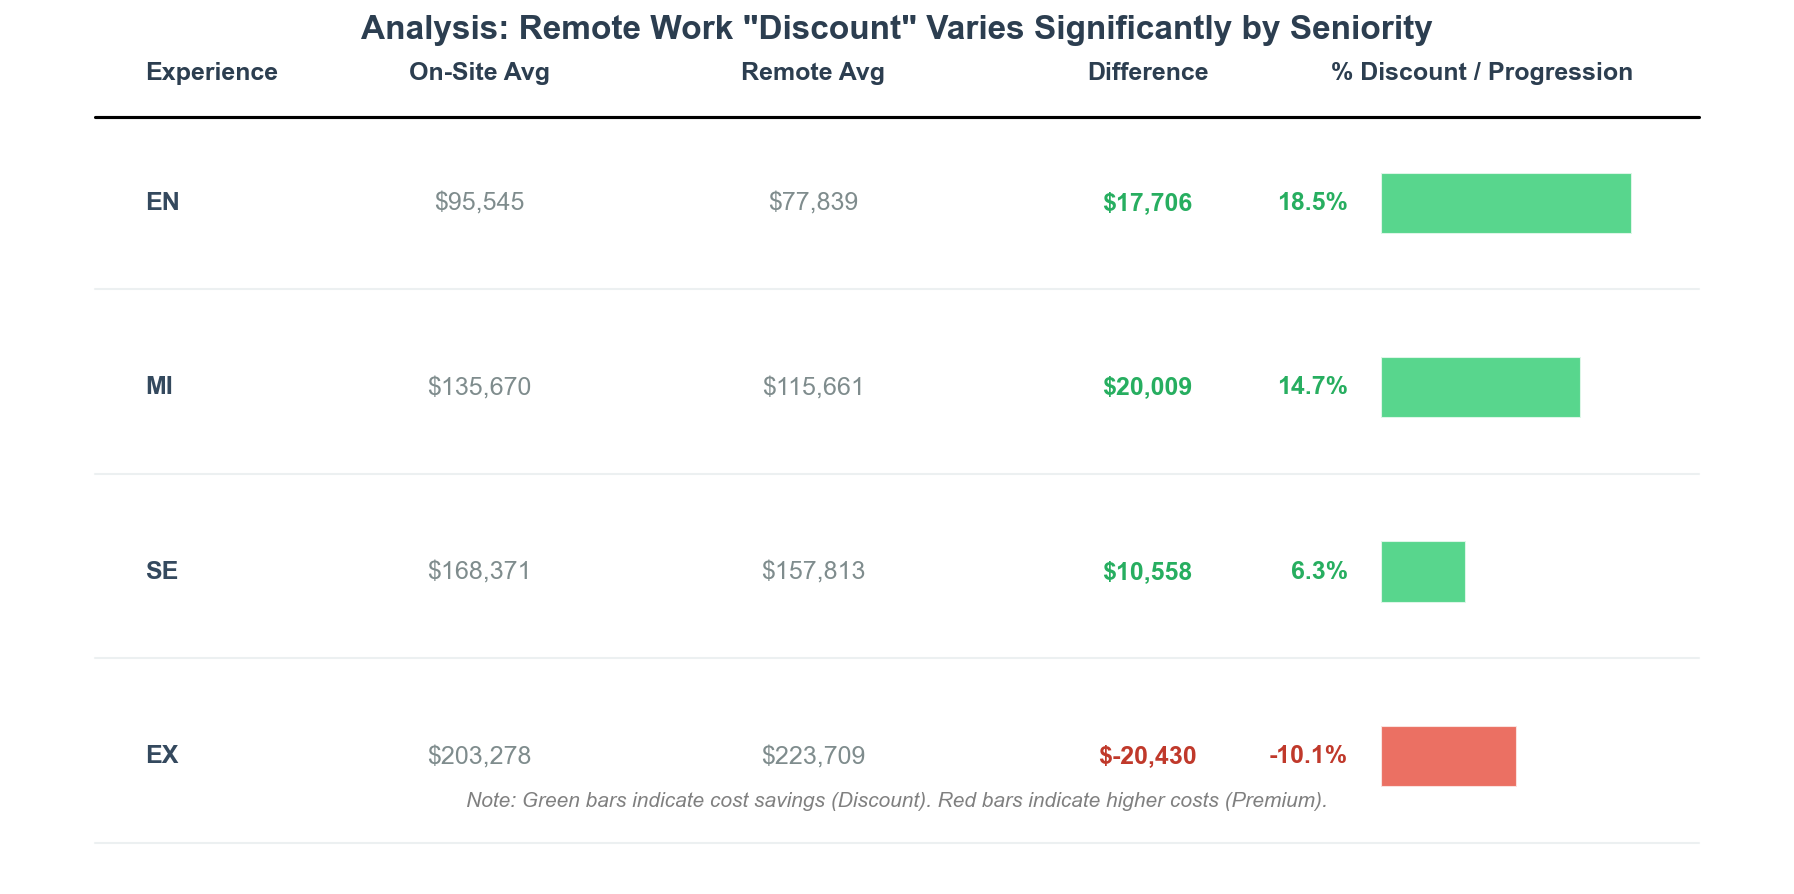

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Preprocessing
df['remote_status'] = df['remote_ratio'].map({0: 'On-Site', 50: 'Hybrid', 100: 'Remote'})
exp_order = ['EN', 'MI', 'SE', 'EX']

# 1. Calculate Summary Statistics
# Filter for only On-Site and Remote for the comparison table
df_filtered = df[df['remote_status'].isin(['On-Site', 'Remote'])]
summary = df_filtered.groupby(['experience_level', 'remote_status'])['salary_in_usd'].mean().unstack()

# Reorder index to ensure logical flow: Entry -> Expert
summary = summary.reindex(exp_order)

# Calculate key metrics
summary['Difference'] = summary['On-Site'] - summary['Remote']
summary['% Discount'] = (summary['Difference'] / summary['On-Site']) * 100

# 2. Plotting the "Table-Chart Hybrid"
fig, ax = plt.subplots(figsize=(12, 6))

# Hide axes (we are drawing a custom table)
ax.axis('off')

# Layout Parameters
col_headers = ['Experience', 'On-Site Avg', 'Remote Avg', 'Difference', '% Discount / Progression']
col_x_positions = [0.05, 0.25, 0.45, 0.65, 0.85]  # X-coordinates for columns
row_start_y = 0.80
row_height = 0.15

# Draw Headers
for i, header in enumerate(col_headers):
    ax.text(col_x_positions[i], 0.9, header, weight='bold', size=12, 
            ha='left' if i == 0 else 'center', color='#2c3e50')

# Draw Header Underline
ax.plot([0.02, 0.98], [0.87, 0.87], color='black', linewidth=1.5)

# Determine scaling for bars
max_val = max(summary['% Discount'].abs().max(), 1) # Avoid div/0

# Draw Rows
y = row_start_y
for idx, row in summary.iterrows():
    # 1. Experience Level (Row Header)
    ax.text(col_x_positions[0], y, idx, size=12, ha='left', va='center', weight='bold', color='#34495e')
    
    # 2. On-Site Avg
    ax.text(col_x_positions[1], y, f"${row['On-Site']:,.0f}", size=12, ha='center', va='center', color='#7f8c8d')
    
    # 3. Remote Avg
    ax.text(col_x_positions[2], y, f"${row['Remote']:,.0f}", size=12, ha='center', va='center', color='#7f8c8d')
    
    # 4. Difference (Color Coded)
    diff_val = row['Difference']
    color = '#27ae60' if diff_val > 0 else '#c0392b' # Green for savings, Red for premium
    sign = "-" if diff_val > 0 else "+" # "-" means discount (saving), "+" means premium cost
    # Note: "Discount" usually implies "cheaper", so $20k savings is a positive discount.
    # Let's stick to the user's logic: Difference = OnSite - Remote. Positive = Savings.
    
    ax.text(col_x_positions[3], y, f"${diff_val:,.0f}", size=12, ha='center', va='center', weight='bold', color=color)
    
    # 5. % Discount Text & Embedded Bar
    pct_val = row['% Discount']
    pct_text = f"{pct_val:.1f}%"
    
    # Text
    ax.text(col_x_positions[4] - 0.08, y, pct_text, size=12, ha='right', va='center', weight='bold', color=color)
    
    # Bar (Visual)
    bar_x_start = col_x_positions[4] - 0.06 # Start bar right after text
    bar_width_max = 0.15 # Max width in figure coordinates
    bar_width = (abs(pct_val) / max_val) * bar_width_max
    
    # Rectangle(xy, width, height)
    rect_color = '#2ecc71' if pct_val > 0 else '#e74c3c'
    rect = plt.Rectangle((bar_x_start, y - 0.025), bar_width, 0.05, 
                         color=rect_color, alpha=0.8, ec=None)
    ax.add_patch(rect)

    # Row Divider Line
    ax.plot([0.02, 0.98], [y - 0.07, y - 0.07], color='#ecf0f1', linewidth=1)
    
    y -= row_height

# Title and Footnote
plt.title('Analysis: Remote Work "Discount" Varies Significantly by Seniority', 
          fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
plt.figtext(0.5, 0.1, "Note: Green bars indicate cost savings (Discount). Red bars indicate higher costs (Premium).", 
            ha="center", fontsize=10, color='gray', style='italic')

plt.tight_layout()
plt.savefig('rq1_summary_table_bars.png')
plt.show()

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 1. Map Remote Ratio to Work Models
def map_work_model(ratio):
    if ratio == 0: return 'On-site'
    elif ratio == 50: return 'Hybrid'
    else: return 'Remote'

df['work_model'] = df['remote_ratio'].apply(map_work_model)

# 2. Calculate Median Salary by Experience Level & Work Model
grouped = df.groupby(['experience_level', 'work_model'])['salary_in_usd'].median().unstack()

# 3. Calculate "Hybrid Discount" vs On-site (How much cheaper is Hybrid?)
# Formula: (OnSite - Hybrid) / OnSite * 100
discount_table = pd.DataFrame()
discount_table['On-site Median'] = grouped['On-site']
discount_table['Hybrid Median'] = grouped['Hybrid']
discount_table['Remote Median'] = grouped['Remote']
discount_table['Hybrid Discount (%)'] = ((grouped['On-site'] - grouped['Hybrid']) / grouped['On-site']) * 100
discount_table['Remote vs On-site (%)'] = ((grouped['Remote'] - grouped['On-site']) / grouped['On-site']) * 100

print(discount_table)

                  On-site Median  Hybrid Median  Remote Median  \
experience_level                                                 
EN                       89300.0        45896.0        73674.0   
EX                      188000.0       161031.5       218000.0   
MI                      125600.0        66022.0       109000.0   
SE                      156400.0        96113.0       152320.0   

                  Hybrid Discount (%)  Remote vs On-site (%)  
experience_level                                              
EN                          48.604703             -17.498320  
EX                          14.344947              15.957447  
MI                          47.434713             -13.216561  
SE                          38.546675              -2.608696  


C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_11960\3192528986.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=exp_order, palette='Blues')


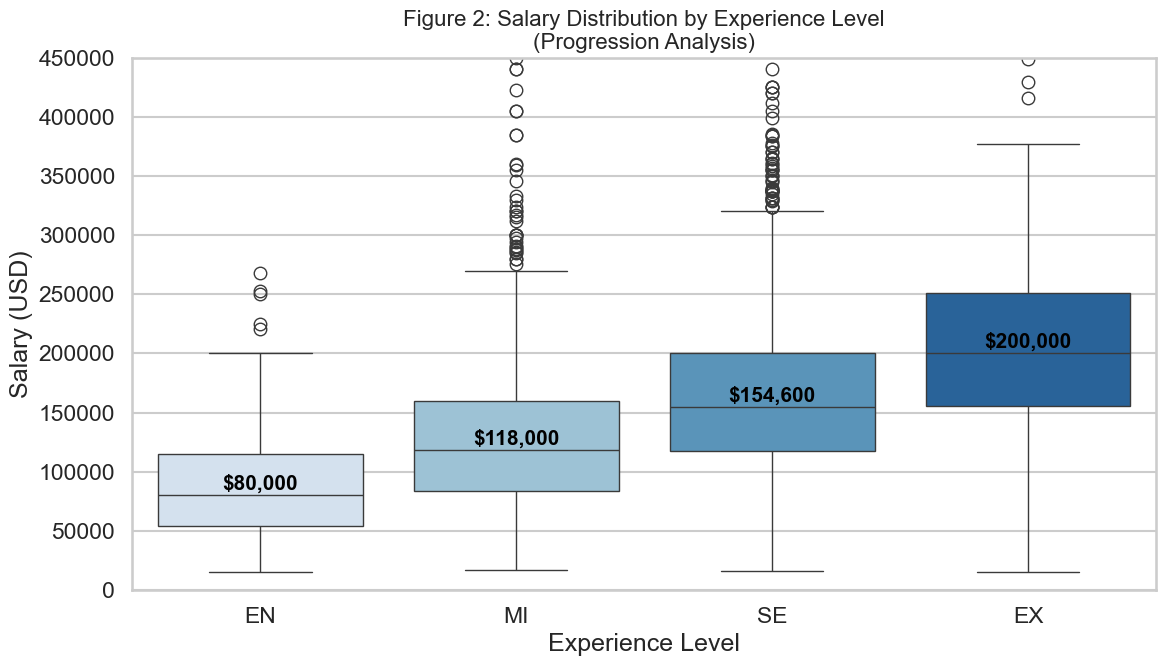

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_11960\3192528986.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_label', y='salary_in_usd', data=df, order=remote_order, palette='viridis')


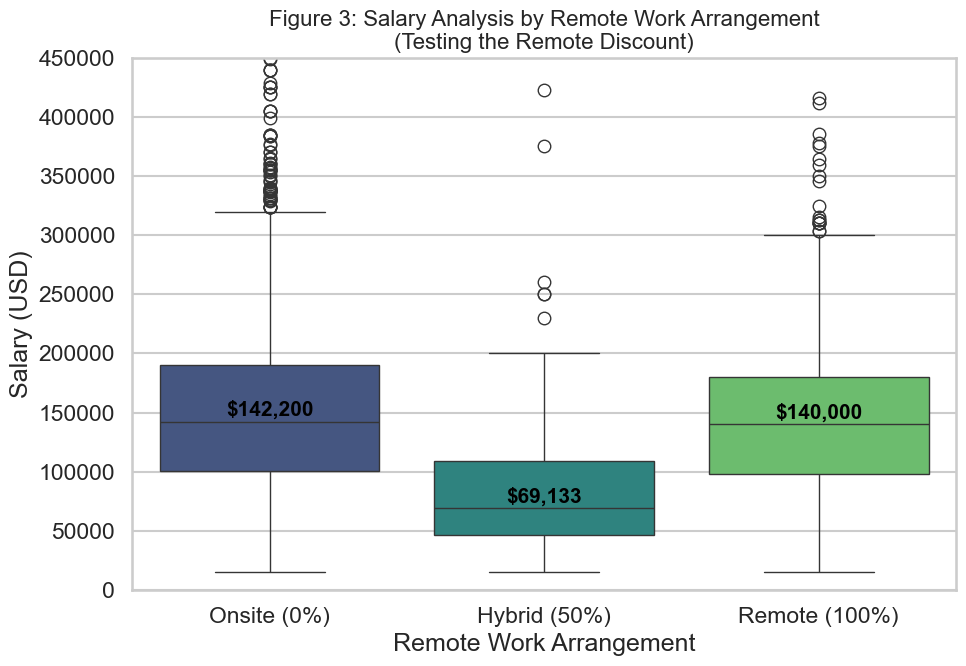

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Set visual style
sns.set(style="whitegrid", context="talk")

# ---------------------------------------------------------
# FIGURE 2: Salary Distribution by Experience Level
# ---------------------------------------------------------
plt.figure(figsize=(12, 7))
exp_order = ['EN', 'MI', 'SE', 'EX']

# Create Box Plot
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=exp_order, palette='Blues')

# Add Median Labels on top of the medians for "Progression Analysis"
medians = df.groupby('experience_level')['salary_in_usd'].median().reindex(exp_order)
for i, median in enumerate(medians):
    plt.text(i, median + 5000, f'${median:,.0f}', 
             horizontalalignment='center', size='small', color='black', weight='semibold')

plt.title('Figure 2: Salary Distribution by Experience Level\n(Progression Analysis)', fontsize=16)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.ylim(0, 450000) # Limit Y-axis to focus on main distribution (hiding extreme outliers >450k)

# Save
plt.tight_layout()
plt.savefig('figure2_salary_experience_progression.png')
plt.show()

# ---------------------------------------------------------
# FIGURE 3: Salary Analysis by Remote Work Arrangement
# ---------------------------------------------------------
plt.figure(figsize=(10, 7))

# Create Labels for Remote Ratio
df['remote_label'] = df['remote_ratio'].map({0: 'Onsite (0%)', 50: 'Hybrid (50%)', 100: 'Remote (100%)'})
remote_order = ['Onsite (0%)', 'Hybrid (50%)', 'Remote (100%)']

# Create Box Plot
sns.boxplot(x='remote_label', y='salary_in_usd', data=df, order=remote_order, palette='viridis')

# Add Median Labels
medians_rem = df.groupby('remote_label')['salary_in_usd'].median().reindex(remote_order)
for i, median in enumerate(medians_rem):
    plt.text(i, median + 5000, f'${median:,.0f}', 
             horizontalalignment='center', size='small', color='black', weight='semibold')

plt.title('Figure 3: Salary Analysis by Remote Work Arrangement\n(Testing the Remote Discount)', fontsize=16)
plt.xlabel('Remote Work Arrangement')
plt.ylabel('Salary (USD)')
plt.ylim(0, 450000)

# Save
plt.tight_layout()
plt.savefig('figure3_salary_remote_analysis.png')
plt.show()

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

def calculate_conclusion_stats(df):
    # ==========================================
    # 1. Experience Level Analysis (Figure 2)
    # ==========================================
    print("--- 1. Experience Level Analysis Stats (Figure 2) ---")
    
    exp_order = ['EN', 'MI', 'SE', 'EX']
    
    # Calculate Quantiles (Q1, Median, Q3) for each level
    summary_exp = df.groupby('experience_level')['salary_in_usd'].quantile([0.25, 0.5, 0.75]).unstack()
    summary_exp = summary_exp.reindex(exp_order)
    summary_exp.columns = ['Q1 (25%)', 'Median (50%)', 'Q3 (75%)']
    summary_exp['IQR'] = summary_exp['Q3 (75%)'] - summary_exp['Q1 (25%)']
    
    print("\n[A] Medians and Variability (IQR):")
    print(summary_exp)
    
    # Progression Premium Calculation
    medians = summary_exp['Median (50%)']
    print("\n[B] Progression Premium (Percentage Increase):")
    try:
        print(f"  - Mid vs Entry: {((medians['MI'] - medians['EN']) / medians['EN']) * 100:.1f}%")
        print(f"  - Senior vs Mid: {((medians['SE'] - medians['MI']) / medians['MI']) * 100:.1f}%")
        print(f"  - Expert vs Senior: {((medians['EX'] - medians['SE']) / medians['SE']) * 100:.1f}%")
        print(f"  - Senior vs Entry (Total Jump): {((medians['SE'] - medians['EN']) / medians['EN']) * 100:.1f}%")
    except KeyError:
        print("  Error: Missing some experience levels in data.")

    # Cost-Benefit Analysis: 2 Mid vs 1 Senior
    cost_2_mid = 2 * medians['MI']
    cost_1_senior = medians['SE']
    diff_mid_senior = cost_2_mid - cost_1_senior
    
    print(f"\n[C] Cost Benefit Analysis (2 Mid vs 1 Senior):")
    print(f"  - Cost of 2 Mid-Levels: ${cost_2_mid:,.0f}")
    print(f"  - Cost of 1 Senior-Level: ${cost_1_senior:,.0f}")
    print(f"  - Difference (Premium for 2 Mids): ${diff_mid_senior:,.0f} ({diff_mid_senior/cost_1_senior*100:.1f}%)")
    
    # Outlier Analysis (Expert > $250k)
    expert_outliers = df[(df['experience_level'] == 'EX') & (df['salary_in_usd'] > 250000)]
    print(f"\n[D] Expert Outliers (> $250k): {len(expert_outliers)} records")
    
    print("\n" + "="*50 + "\n")
    
    # ==========================================
    # 2. Remote Work Analysis (Figure 3)
    # ==========================================
    print("--- 2. Remote Work Arrangement Stats (Figure 3) ---")
    
    # Map remote_ratio to readable labels
    remote_map = {0: 'Onsite', 50: 'Hybrid', 100: 'Remote'}
    df['remote_label'] = df['remote_ratio'].map(remote_map)
    
    # Calculate Stats by Remote Arrangement
    remote_stats = df.groupby('remote_label')['salary_in_usd'].quantile([0.25, 0.5, 0.75]).unstack()
    remote_stats.columns = ['Q1 (25%)', 'Median (50%)', 'Q3 (75%)']
    
    # Add Counts and Percentages
    remote_stats['Count'] = df['remote_label'].value_counts()
    remote_stats['Percentage'] = (remote_stats['Count'] / len(df)) * 100
    
    print("\n[A] Remote Work Statistics (Median, IQR, Sample Size):")
    print(remote_stats[['Median (50%)', 'Q1 (25%)', 'Q3 (75%)', 'Count', 'Percentage']])
    
    # Remote Discount Calculation
    try:
        median_onsite = remote_stats.loc['Onsite', 'Median (50%)']
        median_remote = remote_stats.loc['Remote', 'Median (50%)']
        discount = (median_onsite - median_remote) / median_onsite * 100
        
        print(f"\n[B] Remote Discount Analysis:")
        print(f"  - Onsite Median: ${median_onsite:,.0f}")
        print(f"  - Remote Median: ${median_remote:,.0f}")
        print(f"  - Remote Discount: {discount:.1f}% (Note: If negative, Remote pays more)")
        
        # Distribution Overlap (High Performing Remote vs Low Onsite)
        q3_remote = remote_stats.loc['Remote', 'Q3 (75%)']
        q1_onsite = remote_stats.loc['Onsite', 'Q1 (25%)']
        overlap = q3_remote - q1_onsite
        
        print(f"\n[C] Distribution Overlap:")
        print(f"  - Remote Q3 (75th): ${q3_remote:,.0f}")
        print(f"  - Onsite Q1 (25th): ${q1_onsite:,.0f}")
        print(f"  - Overlap Value: ${overlap:,.0f}")

        # Projected Cost Savings Scenario
        # Scenario: Hiring 50 employees
        baseline_cost = 50 * median_onsite
        optimized_cost = (35 * median_remote) + (15 * median_onsite)
        savings = baseline_cost - optimized_cost
        savings_pct = (savings / baseline_cost) * 100
        
        print(f"\n[D] Projected Cost Savings (Scenario: 50 Hires):")
        print(f"  - Baseline (50 Onsite): ${baseline_cost:,.0f}")
        print(f"  - Optimized (35 Remote, 15 Onsite): ${optimized_cost:,.0f}")
        print(f"  - Annual Savings: ${savings:,.0f} ({savings_pct:.1f}%)")
        
    except KeyError as e:
        print(f"Could not calculate specific remote stats (likely missing 'Onsite' or 'Remote' category): {e}")

# Execute the function
calculate_conclusion_stats(df)

--- 1. Experience Level Analysis Stats (Figure 2) ---

[A] Medians and Variability (IQR):
                  Q1 (25%)  Median (50%)  Q3 (75%)      IQR
experience_level                                           
EN                 54556.5       80000.0  115000.0  60443.5
MI                 83514.0      118000.0  159600.0  76086.0
SE                117832.0      154600.0  200000.0  82168.0
EX                155880.0      200000.0  251000.0  95120.0

[B] Progression Premium (Percentage Increase):
  - Mid vs Entry: 47.5%
  - Senior vs Mid: 31.0%
  - Expert vs Senior: 29.4%
  - Senior vs Entry (Total Jump): 93.2%

[C] Cost Benefit Analysis (2 Mid vs 1 Senior):
  - Cost of 2 Mid-Levels: $236,000
  - Cost of 1 Senior-Level: $154,600
  - Difference (Premium for 2 Mids): $81,400 (52.7%)

[D] Expert Outliers (> $250k): 33 records


--- 2. Remote Work Arrangement Stats (Figure 3) ---

[A] Remote Work Statistics (Median, IQR, Sample Size):
              Median (50%)  Q1 (25%)  Q3 (75%)  Count  Perc

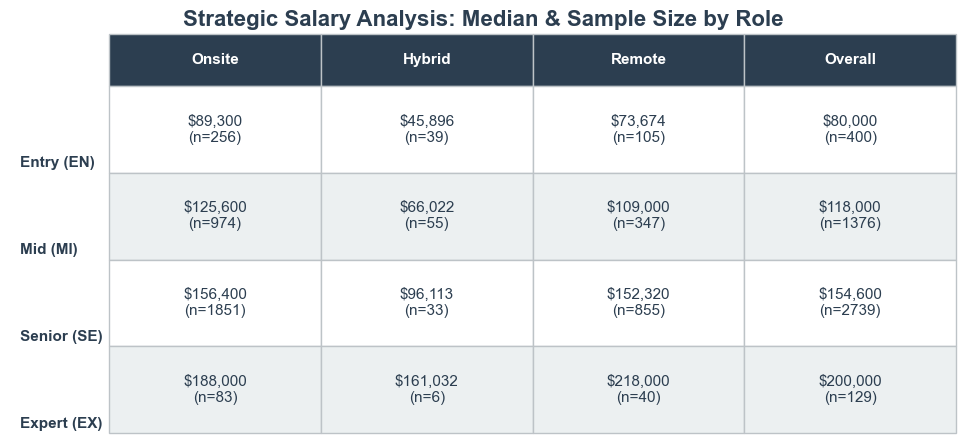

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load Data
try:
    df = pd.read_csv('FoAI_A2_data_4.6k.csv')
except FileNotFoundError:
    print("Error: Please make sure the CSV file is uploaded.")
    # Fallback for demonstration if file missing
    df = pd.DataFrame()

if not df.empty:
    # 2. Prepare Data
    df['remote_label'] = df['remote_ratio'].map({0: 'Onsite', 50: 'Hybrid', 100: 'Remote'})
    exp_order = ['EN', 'MI', 'SE', 'EX']

    # Pivot for Medians and Counts
    median_pivot = df.pivot_table(index='experience_level', columns='remote_label', values='salary_in_usd', aggfunc='median')
    count_pivot = df.pivot_table(index='experience_level', columns='remote_label', values='salary_in_usd', aggfunc='count')

    # Overall Stats
    overall_median = df.groupby('experience_level')['salary_in_usd'].median()
    overall_count = df.groupby('experience_level')['salary_in_usd'].count()

    # 3. Construct Cell Text
    cell_text = []
    row_labels = ['Entry (EN)', 'Mid (MI)', 'Senior (SE)', 'Expert (EX)']
    col_labels = ['Onsite', 'Hybrid', 'Remote', 'Overall']
    cols = ['Onsite', 'Hybrid', 'Remote']

    for exp in exp_order:
        row_data = []
        for col in cols:
            # Safely get value
            if col in median_pivot.columns and exp in median_pivot.index:
                med = median_pivot.loc[exp, col]
                cnt = count_pivot.loc[exp, col]
                if pd.isna(med) or pd.isna(cnt):
                    txt = "N/A"
                else:
                    txt = f"${med:,.0f}\n(n={int(cnt)})"
            else:
                txt = "N/A"
            row_data.append(txt)
        
        # Overall column
        if exp in overall_median.index:
            ov_med = overall_median.loc[exp]
            ov_cnt = overall_count.loc[exp]
            txt = f"${ov_med:,.0f}\n(n={int(ov_cnt)})"
        else:
            txt = "N/A"
        row_data.append(txt)
        
        cell_text.append(row_data)

    # 4. Create Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis('off')

    # Draw Table
    table = ax.table(
        cellText=cell_text,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )

    # 5. Styling
    table.auto_set_font_size(False)
    table.set_fontsize(11)

    # Define Colors
    header_color = '#2c3e50'    # Dark Slate Blue
    row_colors = ['#ecf0f1', '#ffffff']  # Alternating Light Grey / White
    border_color = '#bdc3c7'

    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor(border_color)
        cell.set_linewidth(1)
        
        # Header Row
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(header_color)
            cell.set_height(0.12)
        
        # Row Labels (Index)
        elif col == -1:
            cell.set_text_props(weight='bold', color='#2c3e50')
            cell.set_facecolor('white')
            cell.set_linewidth(0)
        
        # Data Cells
        else:
            cell.set_facecolor(row_colors[row % 2])
            cell.set_height(0.2)  # Height for multi-line text
            cell.set_text_props(color='#2c3e50')

    # Add Title
    plt.suptitle('Strategic Salary Analysis: Median & Sample Size by Role', 
                 fontsize=16, weight='bold', color='#2c3e50', y=0.9)

    # Save
    plt.tight_layout()
    plt.savefig('beautiful_salary_table.png', dpi=300, bbox_inches='tight')
    plt.show()

In [16]:
import pandas as pd

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Group by Experience and Remote Ratio
# We calculate Median (for salary) and Count (for sample size reliability)
grouped_analysis = df.groupby(['experience_level', 'remote_ratio'])['salary_in_usd'].agg(
    Median_Salary='median',
    Sample_Size='count',
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25) # Calculate volatility
).reset_index()

# 3. Pivot for cleaner viewing (Pivot Table)
pivot_table = grouped_analysis.pivot(
    index='experience_level', 
    columns='remote_ratio', 
    values=['Median_Salary', 'Sample_Size']
)

# Reorder index for logical flow
pivot_table = pivot_table.reindex(['EN', 'MI', 'SE', 'EX'])

print("--- MULTIVARIATE ANALYSIS TABLE ---")
print(pivot_table)

--- MULTIVARIATE ANALYSIS TABLE ---
                 Median_Salary                     Sample_Size             
remote_ratio               0         50        100         0     50     100
experience_level                                                           
EN                     89300.0   45896.0   73674.0       256.0  39.0  105.0
MI                    125600.0   66022.0  109000.0       974.0  55.0  347.0
SE                    156400.0   96113.0  152320.0      1851.0  33.0  855.0
EX                    188000.0  161031.5  218000.0        83.0   6.0   40.0


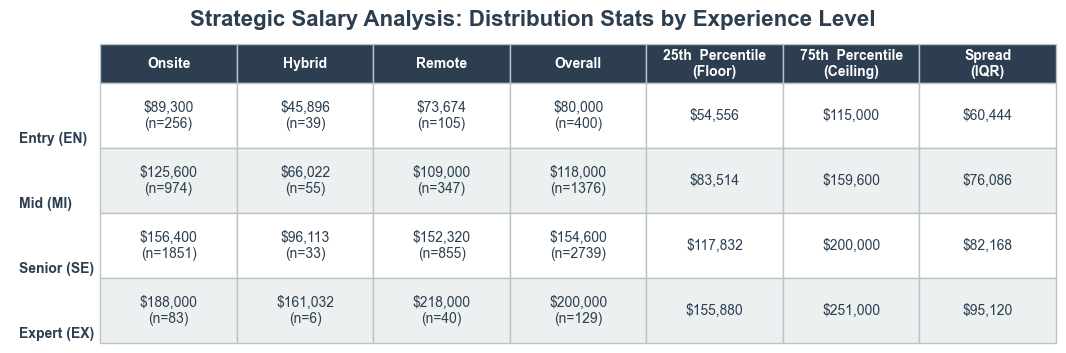

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load Data
try:
    df = pd.read_csv('FoAI_A2_data_4.6k.csv')
except FileNotFoundError:
    print("Error: CSV file not found.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Prepare Data
    df['remote_label'] = df['remote_ratio'].map({0: 'Onsite', 50: 'Hybrid', 100: 'Remote'})
    exp_order = ['EN', 'MI', 'SE', 'EX']

    # Pivots for Remote Splits (Median + Count)
    median_pivot = df.pivot_table(index='experience_level', columns='remote_label', values='salary_in_usd', aggfunc='median')
    count_pivot = df.pivot_table(index='experience_level', columns='remote_label', values='salary_in_usd', aggfunc='count')

    # Overall Stats (Total per Experience Level)
    # This ignores remote status to calculate Floor/Ceiling/IQR for the whole level
    overall_stats = df.groupby('experience_level')['salary_in_usd'].describe(percentiles=[0.25, 0.5, 0.75])

    # 3. Construct Table Data
    cell_text = []
    row_labels = ['Entry (EN)', 'Mid (MI)', 'Senior (SE)', 'Expert (EX)']
    # New column headers
    col_labels = ['Onsite', 'Hybrid', 'Remote', 'Overall', '25th  Percentile\n(Floor)', '75th  Percentile\n(Ceiling)', 'Spread\n(IQR)']
    remote_cols = ['Onsite', 'Hybrid', 'Remote']

    for exp in exp_order:
        row_data = []
        
        # --- A. Remote Columns (Median + n) ---
        for col in remote_cols:
            if col in median_pivot.columns and exp in median_pivot.index:
                med = median_pivot.loc[exp, col]
                cnt = count_pivot.loc[exp, col]
                txt = f"${med:,.0f}\n(n={int(cnt)})" if not pd.isna(med) else "N/A"
            else:
                txt = "N/A"
            row_data.append(txt)
        
        # --- B. Overall Column (Median + n) ---
        if exp in overall_stats.index:
            ov_med = overall_stats.loc[exp, '50%']
            ov_cnt = overall_stats.loc[exp, 'count']
            txt_overall = f"${ov_med:,.0f}\n(n={int(ov_cnt)})"
            
            # --- C. New Stats Columns (Floor, Ceiling, IQR) ---
            floor_25 = overall_stats.loc[exp, '25%']
            ceil_75 = overall_stats.loc[exp, '75%']
            iqr = ceil_75 - floor_25
            
            txt_floor = f"${floor_25:,.0f}"
            txt_ceil = f"${ceil_75:,.0f}"
            txt_iqr = f"${iqr:,.0f}"
        else:
            txt_overall = txt_floor = txt_ceil = txt_iqr = "N/A"
            
        row_data.append(txt_overall)
        row_data.append(txt_floor)
        row_data.append(txt_ceil)
        row_data.append(txt_iqr)
        
        cell_text.append(row_data)

    # 4. Generate Plot
    fig, ax = plt.subplots(figsize=(11, 4)) # Wider layout
    ax.axis('off')

    # Create Table
    table = ax.table(
        cellText=cell_text,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )

    # 5. Styling
    table.auto_set_font_size(False)
    table.set_fontsize(10) # Smaller font for more columns

    # Colors
    header_color = '#2c3e50'
    row_colors = ['#ecf0f1', '#ffffff']
    border_color = '#bdc3c7'

    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor(border_color)
        cell.set_linewidth(1)
        
        # Header Styling
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(header_color)
            cell.set_height(0.12)
        # Row Label Styling
        elif col == -1:
            cell.set_text_props(weight='bold', color='#2c3e50')
            cell.set_facecolor('white')
            cell.set_linewidth(0)
        # Data Cell Styling
        else:
            cell.set_facecolor(row_colors[row % 2])
            cell.set_height(0.2)
            cell.set_text_props(color='#2c3e50')

    # Add Title
    plt.suptitle('Strategic Salary Analysis: Distribution Stats by Experience Level', 
                 fontsize=16, weight='bold', color='#2c3e50', y=0.9)

    # Save and Show
    plt.tight_layout()
    plt.savefig('beautiful_salary_table_extended.png', dpi=300, bbox_inches='tight')
    plt.show()